In [79]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wntr as wn
import networkx as nx
from collections import defaultdict


In [80]:
anomalyFree = "/Users/kavyaub/Documents/mySubjects/ConEdison/NYU_LeakData/LeakData_16Degrees/NYUAnamolData_16Deg_Nodes.xlsx"
nFile0=pd.read_excel(anomalyFree)

In [81]:
anomaly = "/Users/kavyaub/Documents/mySubjects/ConEdison/NYU_LeakData/LeakData_16Degrees/NYUAnamolyData_16Deg_Nodes_Leak1.xlsx"
nFile1=pd.read_excel(anomaly)

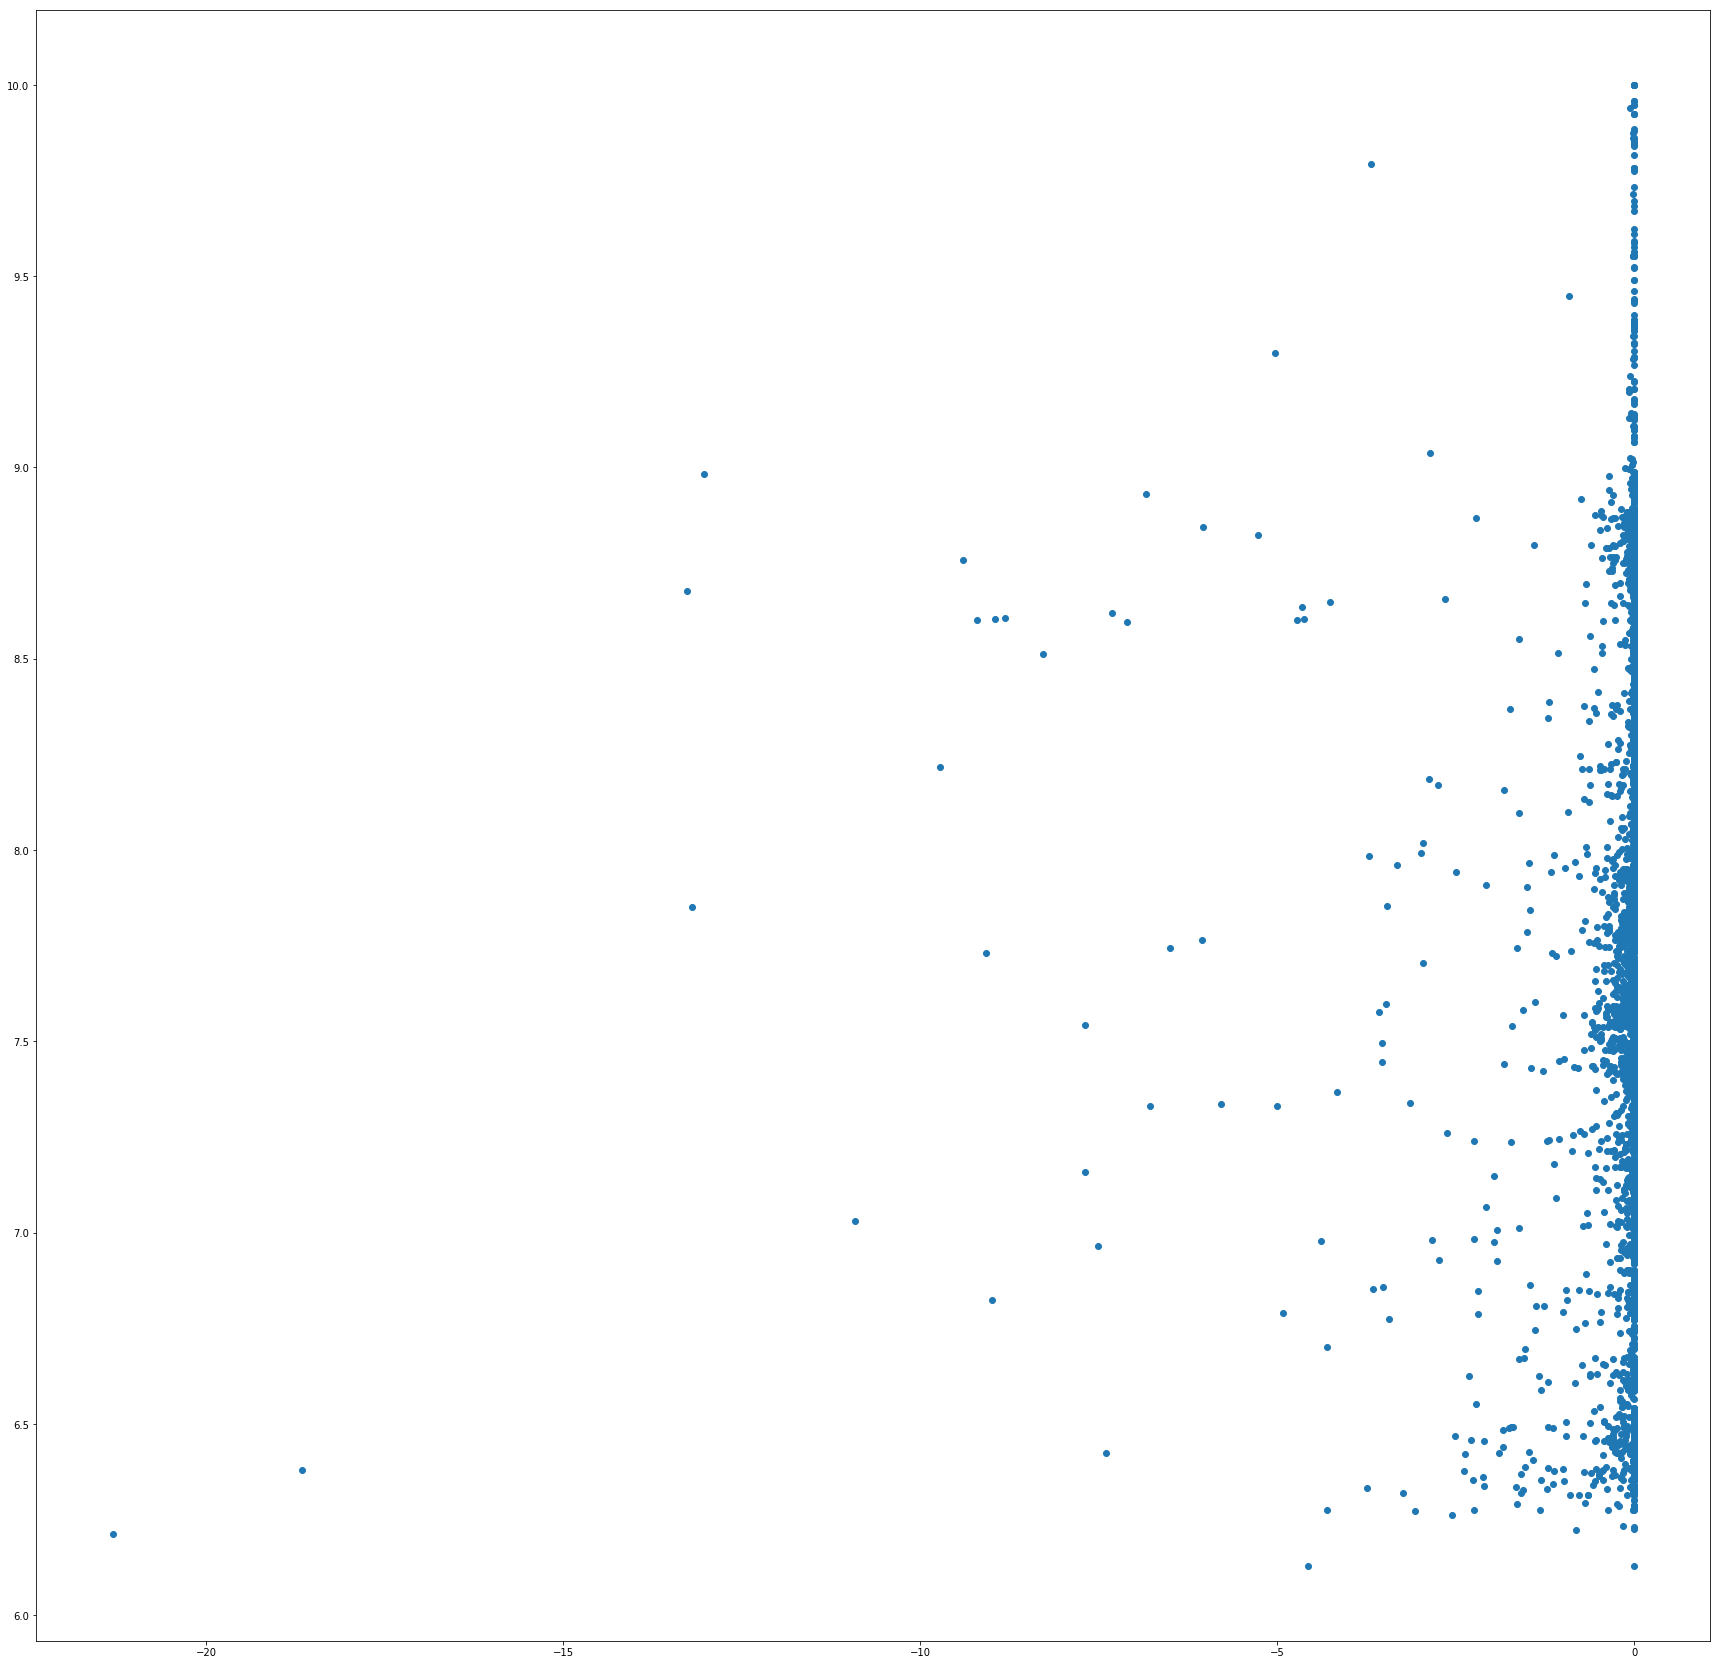

In [82]:
#for col in nFile1.columns:
#    print(col)
#NodeResultFlow
#NodePressure
plt.scatter(nFile1.NodeResultFlow, nFile1.NodePressure)

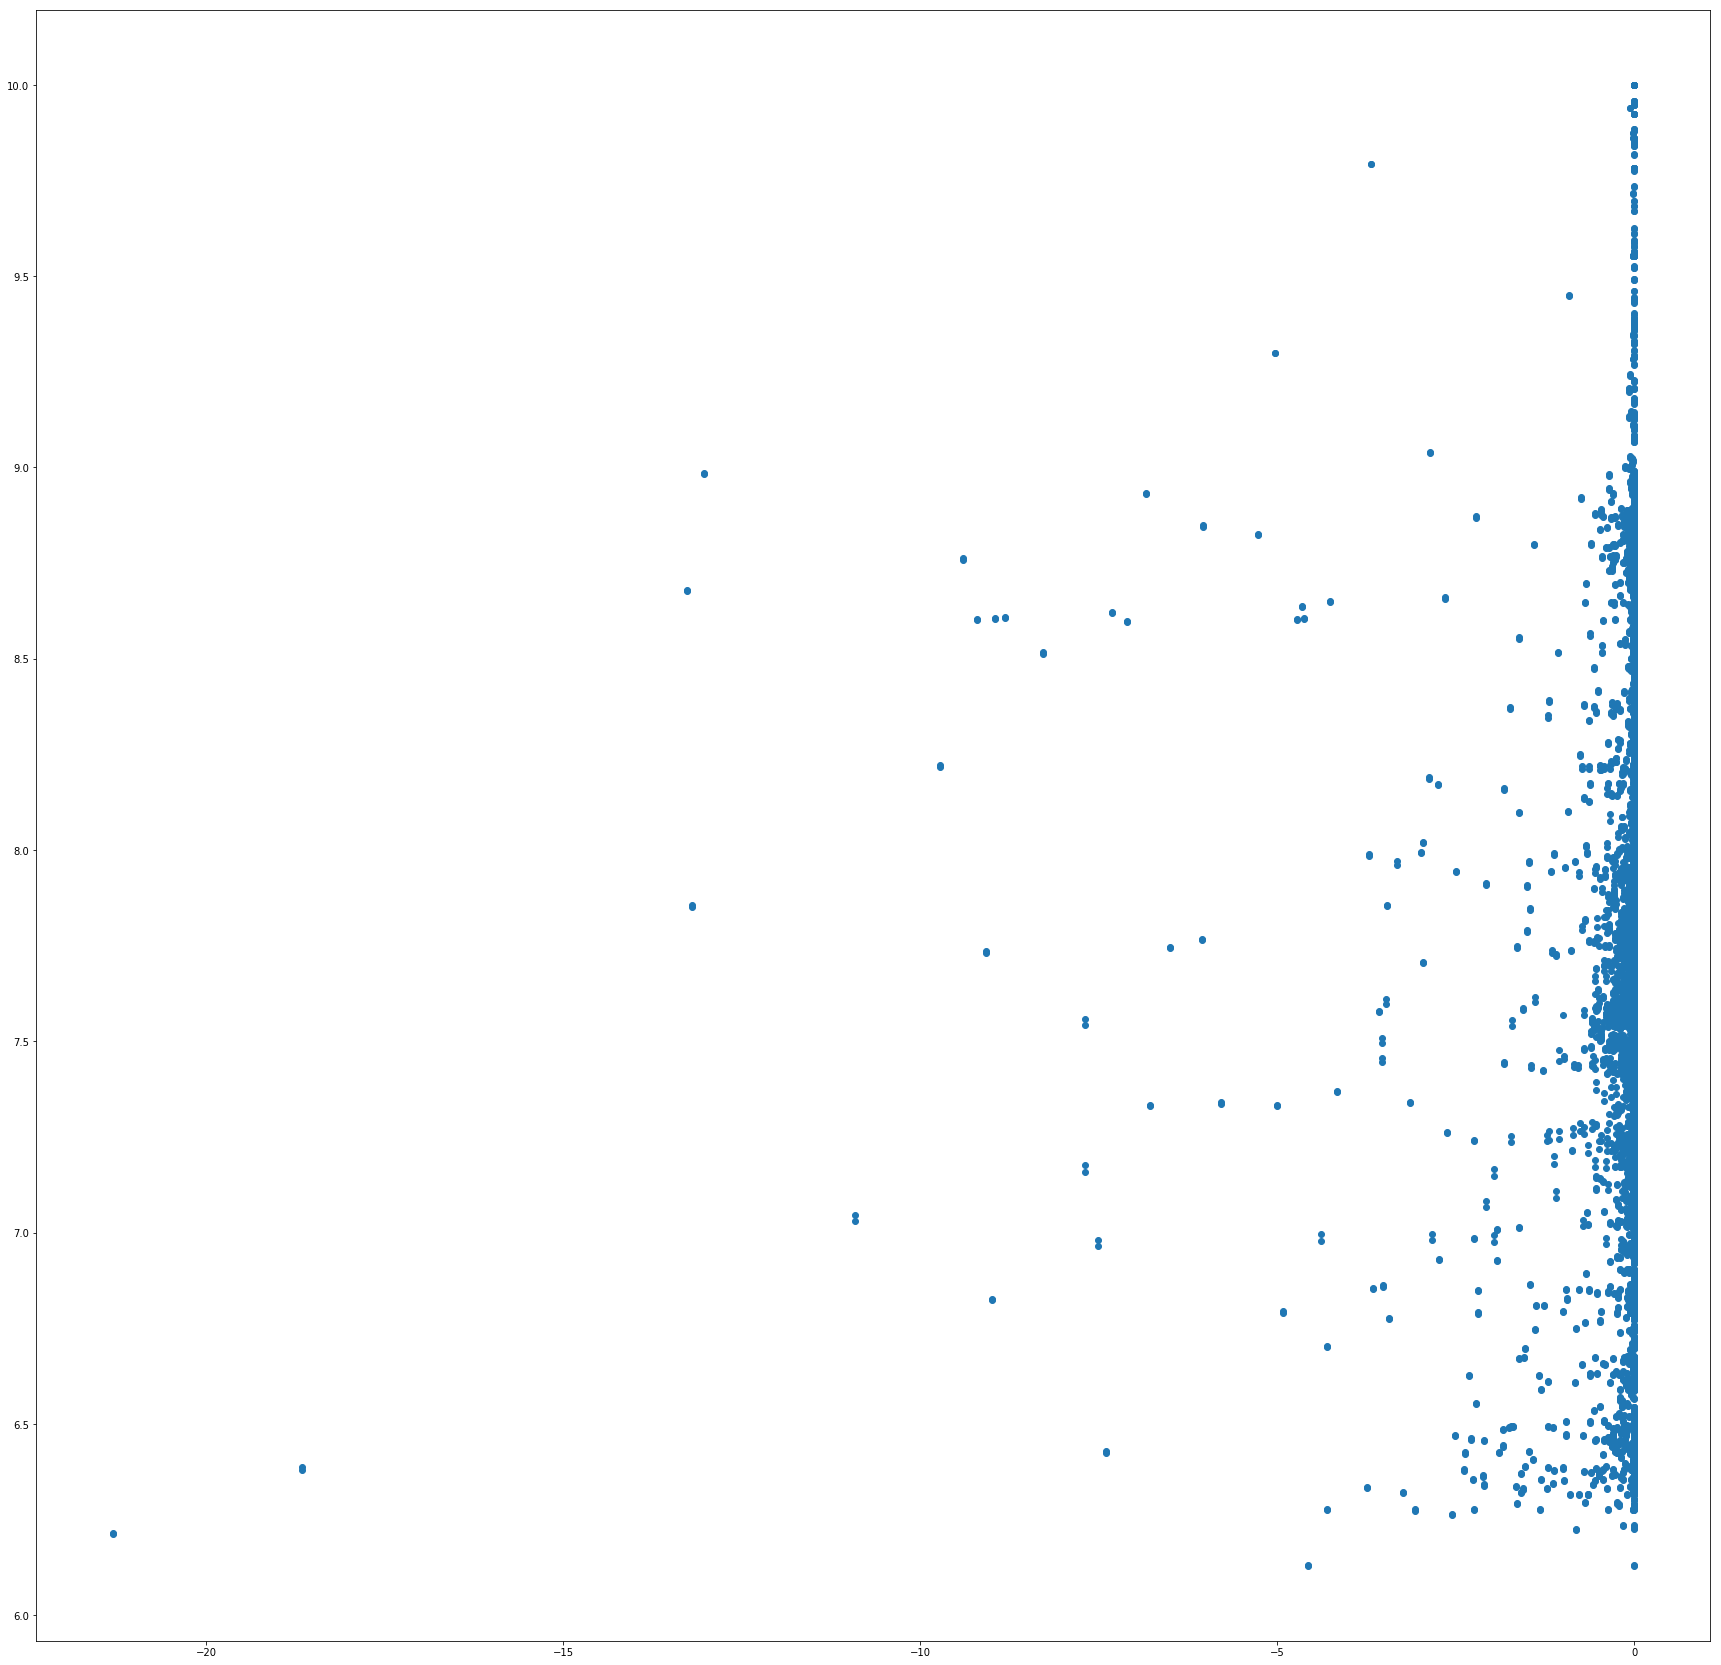

In [83]:
final1 = np.array(nFile0.NodeResultFlow)
finalArray1 = np.append(final1,nFile1.NodeResultFlow)
final2 = np.array(nFile0.NodePressure)
finalArray2 = np.append(final2,nFile1.NodePressure)
plt.scatter(finalArray1, finalArray2)

In [84]:
def pressDeviation(file0, file1):
    res_arr = file1
    res_arr['PressureDeviation']= file1.NodePressure
    res_arr['FlowDeviation']= file1.NodeResultFlow
    res_arr.FlowDeviation = abs(res_arr.NodeResultFlow.subtract(file0.NodeResultFlow))/file0.NodeResultFlow
    res_arr.PressureDeviation = abs(res_arr.PressureDeviation.subtract(file0.NodePressure))/file0.NodePressure
    return res_arr

In [85]:
def get_file(name):
    anomaly = "/Users/kavyaub/Documents/mySubjects/ConEdison/NYU_LeakData"+name
    nFile=pd.read_csv(anomaly)
    return nFile

In [86]:
def reducer(input_df, template_df):
    unique_nodes = template_df.NAME.unique()
    reduced_nodeArr = input_df[input_df.NAME.isin(unique_nodes)]
    reduced_nodeArr.reset_index(inplace = True, drop = True)
    return reduced_nodeArr

In [87]:
preDir = "/ReducedNodeSet/"
name500="CECnodes_500_TableToExcel"
filetype = ".csv"
nodes500 = get_file(preDir+name500+filetype)

preDir = "/LeakData_16Degrees/"
name11="NYU Anamoly Data_16Deg_Nodes_Leak11.csv"
name21="NYU Anamoly Data_16Deg_Nodes_Leak21.csv"
name31="NYU Anamoly Data_16Deg_Nodes_Leak31.csv"
name41="NYU Anamoly Data_16Deg_Nodes_Leak41.csv"

leak11 = get_file(preDir+name11)
leak21 = get_file(preDir+name21)
leak31 = get_file(preDir+name31)
leak41 = get_file(preDir+name41)

leak11_500 = reducer(leak11, nodes500)
leak21_500 = reducer(leak21, nodes500)
leak31_500 = reducer(leak31, nodes500)
leak41_500 = reducer(leak41, nodes500)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [88]:
nFile0_500=reducer(nFile0, nodes500)
nFile1_500=reducer(nFile1, nodes500)

res1 = pressDeviation(nFile0,nFile1)
res11 = pressDeviation(nFile0,leak11)
res21 = pressDeviation(nFile0,leak21)
res31 = pressDeviation(nFile0,leak31)
res41 = pressDeviation(nFile0,leak41)

res1_500 = pressDeviation(nFile0_500, nFile1_500)
res11_500 = pressDeviation(nFile0_500, leak11_500)
res21_500 = pressDeviation(nFile0_500, leak21_500)
res31_500 = pressDeviation(nFile0_500, leak31_500)
res41_500 = pressDeviation(nFile0_500, leak41_500)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:5086: SettingWithCopyWarning:

In [11]:
len(res1.NAME)

4859

In [12]:
preDir = "/LeakData_32Degrees/"
leakFree32 = "NYU Anamoly Data_32Deg_Nodes.csv"
name32_01="NYU Anamoly Data_32Deg_Nodes_Leak1.csv"
name32_11="NYU Anamoly Data_32Deg_Nodes_Leak11.csv"
name32_21="NYU Anamoly Data_32Deg_Nodes_Leak21.csv"
name32_31="NYU Anamoly Data_32Deg_Nodes_Leak31.csv"
name32_41="NYU Anamoly Data_32Deg_Nodes_Leak41.csv"

leak32_00 = get_file(preDir+leakFree32)
leak32_01 = get_file(preDir+name32_01)
leak32_11 = get_file(preDir+name32_11)
leak32_21 = get_file(preDir+name32_21)
leak32_31 = get_file(preDir+name32_31)
leak32_41 = get_file(preDir+name32_41)

leak32_00_500 = reducer(leak32_00, nodes500)
leak32_01_500 = reducer(leak32_01, nodes500)
leak32_11_500 = reducer(leak32_11, nodes500)
leak32_21_500 = reducer(leak32_21, nodes500)
leak32_31_500 = reducer(leak32_31, nodes500)
leak32_41_500 = reducer(leak32_41, nodes500)

In [13]:
res32_1 = pressDeviation(leak32_00,leak32_01)
res32_11 = pressDeviation(leak32_00,leak32_11)
res32_21 = pressDeviation(leak32_00,leak32_21)
res32_31 = pressDeviation(leak32_00,leak32_31)
res32_41 = pressDeviation(leak32_00,leak32_41)


res32_1_500 = pressDeviation(leak32_00_500, leak32_01_500)
res32_11_500 = pressDeviation(leak32_00_500, leak32_11_500)
res32_21_500 = pressDeviation(leak32_00_500, leak32_21_500)
res32_31_500 = pressDeviation(leak32_00_500, leak32_31_500)
res32_41_500 = pressDeviation(leak32_00_500, leak32_41_500)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [14]:
preDir = "/LeakData_48Degrees/"
leakFree48 = "NYU Anamoly Data_48Deg_Nodes.csv"
name48_01="NYU Anamoly Data_48Deg_Nodes_Leak1.csv"
name48_11="NYU Anamoly Data_48Deg_Nodes_Leak11.csv"
name48_21="NYU Anamoly Data_48Deg_Nodes_Leak21.csv"
name48_31="NYU Anamoly Data_48Deg_Nodes_Leak31.csv"
name48_41="NYU Anamoly Data_48Deg_Nodes_Leak41.csv"

leak48_00 = get_file(preDir+leakFree48)
leak48_01 = get_file(preDir+name48_01)
leak48_11 = get_file(preDir+name48_11)
leak48_21 = get_file(preDir+name48_21)
leak48_31 = get_file(preDir+name48_31)
leak48_41 = get_file(preDir+name48_41)


leak48_00_500 = reducer(leak48_00, nodes500)
leak48_01_500 = reducer(leak48_01, nodes500)
leak48_11_500 = reducer(leak48_11, nodes500)
leak48_21_500 = reducer(leak48_21, nodes500)
leak48_31_500 = reducer(leak48_31, nodes500)
leak48_41_500 = reducer(leak48_41, nodes500)



res48_1 = pressDeviation(leak48_00,leak48_01)
res48_11 = pressDeviation(leak48_00,leak48_11)
res48_21 = pressDeviation(leak48_00,leak48_21)
res48_31 = pressDeviation(leak48_00,leak48_31)
res48_41 = pressDeviation(leak48_00,leak48_41)


res48_1_500 = pressDeviation(leak48_00_500, leak48_01_500)
res48_11_500 = pressDeviation(leak48_00_500, leak48_11_500)
res48_21_500 = pressDeviation(leak48_00_500, leak48_21_500)
res48_31_500 = pressDeviation(leak48_00_500, leak48_31_500)
res48_41_500 = pressDeviation(leak48_00_500, leak48_41_500)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:
max(res48_41.PressureDeviation)

0.19485525689950706

In [16]:
preDir = "/LeakData_64Degrees/"
leakFree64 = "NYU Anamoly Data_64Deg_Nodes.csv"
name64_01="NYU Anamoly Data_64Deg_Nodes_Leak1.csv"
name64_11="NYU Anamoly Data_64Deg_Nodes_Leak11.csv"
name64_21="NYU Anamoly Data_64Deg_Nodes_Leak21.csv"
name64_31="NYU Anamoly Data_64Deg_Nodes_Leak31.csv"
name64_41="NYU Anamoly Data_64Deg_Nodes_Leak41.csv"

leak64_00 = get_file(preDir+leakFree64)
leak64_01 = get_file(preDir+name64_01)
leak64_11 = get_file(preDir+name64_11)
leak64_21 = get_file(preDir+name64_21)
leak64_31 = get_file(preDir+name64_31)
leak64_41 = get_file(preDir+name64_41)



leak64_00_500 = reducer(leak64_00, nodes500)
leak64_01_500 = reducer(leak64_01, nodes500)
leak64_11_500 = reducer(leak64_11, nodes500)
leak64_21_500 = reducer(leak64_21, nodes500)
leak64_31_500 = reducer(leak64_31, nodes500)
leak64_41_500 = reducer(leak64_41, nodes500)



res64_1 = pressDeviation(leak64_00,leak64_01)
res64_11 = pressDeviation(leak64_00,leak64_11)
res64_21 = pressDeviation(leak64_00,leak64_21)
res64_31 = pressDeviation(leak64_00,leak64_31)
res64_41 = pressDeviation(leak64_00,leak64_41)


res64_1_500 = pressDeviation(leak64_00_500, leak64_01_500)
res64_11_500 = pressDeviation(leak64_00_500, leak64_11_500)
res64_21_500 = pressDeviation(leak64_00_500, leak64_21_500)
res64_31_500 = pressDeviation(leak64_00_500, leak64_31_500)
res64_41_500 = pressDeviation(leak64_00_500, leak64_41_500)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [89]:
preDir = "/LeakData_ZeroDegrees/"
leakFree48 = "NYU Anamoly Data_ZeroDeg_Nodes.csv"
name0_01="NYU Anamoly Data_ZeroDeg_Nodes_Leak1.csv"
name0_11="NYU Anamoly Data_ZeroDeg_Nodes_Leak11.csv"
name0_21="NYU Anamoly Data_ZeroDeg_Nodes_Leak21.csv"
name0_31="NYU Anamoly Data_ZeroDeg_Nodes_Leak31.csv"
name0_41="NYU Anamoly Data_ZeroDeg_Nodes_Leak41.csv"

leak0_00 = get_file(preDir+leakFree48)
leak0_01 = get_file(preDir+name0_01)
leak0_11 = get_file(preDir+name0_11)
leak0_21 = get_file(preDir+name0_21)
leak0_31 = get_file(preDir+name0_31)
leak0_41 = get_file(preDir+name0_41)

leak0_00_500 = reducer(leak0_00, nodes500)
leak0_01_500 = reducer(leak0_01, nodes500)
leak0_11_500 = reducer(leak0_11, nodes500)
leak0_21_500 = reducer(leak0_21, nodes500)
leak0_31_500 = reducer(leak0_31, nodes500)
leak0_41_500 = reducer(leak0_41, nodes500)


res0_1 = pressDeviation(leak0_00,leak0_01)
res0_11 = pressDeviation(leak0_00,leak0_11)
res0_21 = pressDeviation(leak0_00,leak0_21)
res0_31 = pressDeviation(leak0_00,leak0_31)
res0_41 = pressDeviation(leak0_00,leak0_41)

res0_1_500 = pressDeviation(leak0_00_500, leak0_01_500)
res0_11_500 = pressDeviation(leak0_00_500, leak0_11_500)
res0_21_500 = pressDeviation(leak0_00_500, leak0_21_500)
res0_31_500 = pressDeviation(leak0_00_500, leak0_31_500)
res0_41_500 = pressDeviation(leak0_00_500, leak0_41_500)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [18]:
def draw_graph(graphArr):
    cntrlnd = '0BEC50B8'

    G = nx.Graph()

    pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.NAME,graphArr.NodeXCoordinate,graphArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    nodepressure_dict0 = {val:item for val, item in zip(graphArr.NAME,graphArr.PressureDeviation)}

    node_list = list(graphArr.NAME)
    G.add_nodes_from(pos_dict0.keys())
    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['pressure'] = nodepressure_dict0[n]

    for i, label in enumerate(pipesdf0['NAME']):
        pdest = pipesdf0['FacilityToNodeName'].iloc[i]
        psource = pipesdf0['FacilityFromNodeName'].iloc[i]
        pressure = pipesdf0['PipeAvePressure'].iloc[i]
        name = pipesdf0['NAME'].iloc[i]
        G.add_edge(psource, pdest, p = pressure, n = name)

    n_data = list(G.nodes(data=True))
    p_data = list(G.edges(data=True))

    nodeinfo = nx.get_node_attributes(G, 'pressure')
    nodeinfo[cntrlnd]

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 30
    fig_size[1] = 30
    plt.rcParams["figure.figsize"] = fig_size
    print("Current size:", fig_size)

    labels = {}
    labels[cntrlnd] = r'$\delta$'
    
    lower =0.0
    upper=0.3
    colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
    cmap= matplotlib.colors.ListedColormap(colors)
    cmap.set_under("crimson")
    cmap.set_over("w")
    norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)

    nodes = G.nodes()
    ec = nx.draw_networkx_edges(G, pos = pos_dict0, alpha=1)
    nc = nx.draw_networkx_nodes(G, pos = pos_dict0, nodelist=nodes, node_color=graphArr['PressureDeviation'], with_labels=False, node_size=25, cmap=cmap, vmin=0.0, vmax=0.3)
    lc = nx.draw_networkx_labels(G, pos = pos_dict0, labels = labels, font_size=32, font_color='r')
    
    plt.colorbar(nc)
    plt.axis('off')
    plt.savefig("/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/press5.png")
    plt.show()

In [19]:
#############
#refer to https://www.idtools.com.au/3d-network-graphs-python-mplot3d-toolkit/
##############

import warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits.mplot3d import Axes3D

matplotlib_axes_logger.setLevel('ERROR')

def draw_3d(graphArr):

    cntrlnd = '0BEC50B8'

    G = nx.Graph()

    pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.NAME,graphArr.NodeXCoordinate,graphArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    nodepressure_dict0 = {val:item for val, item in zip(graphArr.NAME,graphArr.PressureDeviation)}

    d3pos_dict = defaultdict(list)
    for d in (pos_dict0, nodepressure_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)

    node_list = list(graphArr.NAME)
    G.add_nodes_from(pos_dict0.keys())
    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['pressure'] = nodepressure_dict0[n]

    for i, label in enumerate(pipesdf0['NAME']):
        pdest = pipesdf0['FacilityToNodeName'].iloc[i]
        psource = pipesdf0['FacilityFromNodeName'].iloc[i]
        pressure = pipesdf0['PipeAvePressure'].iloc[i]
        name = pipesdf0['NAME'].iloc[i]
        G.add_edge(psource, pdest, p = pressure, n = name)

    def network_plot_3D(G, angle, save=True):
        
        lower = 0.0
        upper = 0.3
        colors = plt.cm.jet((graphArr.PressureDeviation-lower)/(upper-lower))
        
        tp2 = (graphArr.PressureDeviation-lower)/(upper-lower)
        colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
        cmap= matplotlib.colors.ListedColormap(colors)
        cmap.set_under("crimson")
        cmap.set_over("w")
        norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)
        mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
        cc = cmap(tp2)


        # 3D network plot
        with plt.style.context(('ggplot')):

            fig = plt.figure(figsize=(30,30))
            ax = Axes3D(fig)
            ax.set_xlabel('x-coordinates',fontsize=30)
            ax.set_ylabel('y-coordinates',fontsize=30)
            ax.set_zlabel('Pressure Deviation', fontsize=30)
            ax.set_zlim(0.0,0.3)


            # Loop on the pos dictionary to extract the x,y,z coordinates of each node
            ctr=0
            for key, value in d3pos_dict0.items():
                xi = value[0][0]
                yi = value[0][1]
                zi = value[1]

                # Scatter plot
                ax.scatter(xi, yi, zi,c=cc[ctr], edgecolors='k', alpha=0.5, s=80)
                ctr=ctr+1

            # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
            # Those two points are the extrema of the line to be plotted
            for i,j in enumerate(G.edges()):
                x = np.array((d3pos_dict0[j[0]][0][0], d3pos_dict0[j[1]][0][0]))
                y = np.array((d3pos_dict0[j[0]][0][1], d3pos_dict0[j[1]][0][1]))
                z = np.array((d3pos_dict0[j[0]][1], d3pos_dict0[j[1]][1]))

            # Plot the connecting lines
                ax.plot(x, y, z, c='black',alpha=0.5)

        # Set the initial view
        angleVerticle = 30
        ax.view_init(angleVerticle, angle)
        ax.zaxis.set_tick_params(labelsize='22',pad=17)
        ax.zaxis.labelpad = 40
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 20
        # Hide the axes
        #ax.set_axis_off()

        if save is not False:
            plt.savefig("/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/Leak_1_ZeroDegrees.png")
            plt.show()
        else:
            plt.show()

        return

    network_plot_3D(G, 60)

In [90]:
color_picker=np.array([[0,0,0,0,0],[0,0,1,1,1],[0,1,2,2,2],[1,2,2,3,3],[1,2,3,3,4],[2,2,3,4,4]])
color_picker
def color_indexer(input_arr):
    out_arr=np.array(input_arr)
    for i in range(0,input_arr[0].size):
        out_arr[0,i]=color_picker[input_arr[0,i]][0]
        out_arr[1,i]=color_picker[input_arr[1,i]][1]
        out_arr[2,i]=color_picker[input_arr[2,i]][2]
        out_arr[3,i]=color_picker[input_arr[3,i]][3]
        out_arr[4,i]=color_picker[input_arr[4,i]][4]

    return out_arr

In [94]:
scaled_vals=np.array([res0_1.PressureDeviation ,res0_11.PressureDeviation,res0_21.PressureDeviation,res0_31.PressureDeviation, res0_41.PressureDeviation])
scaled_vals[scaled_vals > 0.24] = 5
scaled_vals[scaled_vals <=0.03] = 6
scaled_vals[scaled_vals <=0.06] = 1
scaled_vals[scaled_vals <=0.12] = 2
scaled_vals[scaled_vals <=0.18] = 3
scaled_vals[scaled_vals <=0.24] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed0_41=res0_41
color_indexed0_41['color']=colors_array[4]
color_indexed0_31=res0_31
color_indexed0_31['color']=colors_array[3]
color_indexed0_21=res0_21
color_indexed0_21['color']=colors_array[2]
color_indexed0_11=res0_11
color_indexed0_11['color']=colors_array[1]
color_indexed0_1=res0_1
color_indexed0_1['color']=colors_array[0]

color_indexed0_1.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak0/leak1_pressure_deviation.csv')
color_indexed0_11.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak0/'+name0_11+'_pressure_deviation.csv')
color_indexed0_21.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak0/'+name0_21+'_pressure_deviation.csv')
color_indexed0_31.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak0/'+name0_31+'_pressure_deviation.csv')
color_indexed0_41.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak0/'+name0_41+'_pressure_deviation.csv')


In [22]:
scaled_vals=np.array([res0_1_500.PressureDeviation ,res0_11_500.PressureDeviation,res0_21_500.PressureDeviation,res0_31_500.PressureDeviation, res0_41_500.PressureDeviation])
scaled_vals[scaled_vals > 0.24] = 5
scaled_vals[scaled_vals <=0.03] = 6
scaled_vals[scaled_vals <=0.06] = 1
scaled_vals[scaled_vals <=0.12] = 2
scaled_vals[scaled_vals <=0.18] = 3
scaled_vals[scaled_vals <=0.24] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed0_41_500=res0_41_500
color_indexed0_41_500['color']=colors_array[4]
color_indexed0_31_500=res0_31_500
color_indexed0_31_500['color']=colors_array[3]
color_indexed0_21_500=res0_21_500
color_indexed0_21_500['color']=colors_array[2]
color_indexed0_11_500=res0_11_500
color_indexed0_11_500['color']=colors_array[1]
color_indexed0_1_500=res0_1_500
color_indexed0_1_500['color']=colors_array[0]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [23]:
scaled_vals=np.array([res1.PressureDeviation ,res11.PressureDeviation,res21.PressureDeviation,res31.PressureDeviation, res41.PressureDeviation])
scaled_vals[scaled_vals > 0.24] = 5
scaled_vals[scaled_vals <=0.03] = 6
scaled_vals[scaled_vals <=0.06] = 1
scaled_vals[scaled_vals <=0.12] = 2
scaled_vals[scaled_vals <=0.18] = 3
scaled_vals[scaled_vals <=0.24] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed41=res41
color_indexed41['color']=colors_array[4]
color_indexed31=res31
color_indexed31['color']=colors_array[3]
color_indexed21=res21
color_indexed21['color']=colors_array[2]
color_indexed11=res11
color_indexed11['color']=colors_array[1]
color_indexed1=res1
color_indexed1['color']=colors_array[0]

color_indexed1.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak16/leak1_pressure_deviation.csv')
color_indexed11.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak16/'+name11+'_pressure_deviation.csv')
color_indexed21.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak16/'+name21+'_pressure_deviation.csv')
color_indexed31.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak16/'+name31+'_pressure_deviation.csv')
color_indexed41.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak16/'+name41+'_pressure_deviation.csv')


In [24]:
scaled_vals=np.array([res1_500.PressureDeviation ,res11_500.PressureDeviation,res21_500.PressureDeviation,res31_500.PressureDeviation, res41_500.PressureDeviation])
scaled_vals[scaled_vals > 0.24] = 5
scaled_vals[scaled_vals <=0.03] = 6
scaled_vals[scaled_vals <=0.06] = 1
scaled_vals[scaled_vals <=0.12] = 2
scaled_vals[scaled_vals <=0.18] = 3
scaled_vals[scaled_vals <=0.24] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed41_500=res41_500
color_indexed41_500['color']=colors_array[4]
color_indexed31_500=res31_500
color_indexed31_500['color']=colors_array[3]
color_indexed21_500=res21_500
color_indexed21_500['color']=colors_array[2]
color_indexed11_500=res11_500
color_indexed11_500['color']=colors_array[1]
color_indexed1_500=res1_500
color_indexed1_500['color']=colors_array[0]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [33]:
scaled_vals=np.array([res32_1.PressureDeviation ,res32_11.PressureDeviation,res32_21.PressureDeviation,res32_31.PressureDeviation, res32_41.PressureDeviation])
scaled_vals[scaled_vals > 0.24] = 5
scaled_vals[scaled_vals <=0.03] = 6
scaled_vals[scaled_vals <=0.06] = 1
scaled_vals[scaled_vals <=0.12] = 2
scaled_vals[scaled_vals <=0.18] = 3
scaled_vals[scaled_vals <=0.24] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed32_41=res32_41
color_indexed32_41['color']=colors_array[4]
color_indexed32_31=res32_31
color_indexed32_31['color']=colors_array[3]
color_indexed32_21=res32_21
color_indexed32_21['color']=colors_array[2]
color_indexed32_11=res32_11
color_indexed32_11['color']=colors_array[1]
color_indexed32_1=res32_1
color_indexed32_1['color']=colors_array[0]

color_indexed32_1.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak32/leak1_pressure_deviation.csv')
color_indexed32_11.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak32/'+name32_11+'_pressure_deviation.csv')
color_indexed32_21.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak32/'+name32_21+'_pressure_deviation.csv')
color_indexed32_31.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak32/'+name32_31+'_pressure_deviation.csv')
color_indexed32_41.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak32/'+name32_41+'_pressure_deviation.csv')



In [34]:
scaled_vals=np.array([res32_1_500.PressureDeviation ,res32_11_500.PressureDeviation,res32_21_500.PressureDeviation,res32_31_500.PressureDeviation, res32_41_500.PressureDeviation])
scaled_vals[scaled_vals > 0.24] = 5
scaled_vals[scaled_vals <=0.03] = 6
scaled_vals[scaled_vals <=0.06] = 1
scaled_vals[scaled_vals <=0.12] = 2
scaled_vals[scaled_vals <=0.18] = 3
scaled_vals[scaled_vals <=0.24] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed32_41_500=res32_41_500
color_indexed32_41_500['color']=colors_array[4]
color_indexed32_31_500=res32_31_500
color_indexed32_31_500['color']=colors_array[3]
color_indexed32_21_500=res32_21_500
color_indexed32_21_500['color']=colors_array[2]
color_indexed32_11_500=res32_11_500
color_indexed32_11_500['color']=colors_array[1]
color_indexed32_1_500=res32_1_500
color_indexed32_1_500['color']=colors_array[0]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [35]:
scaled_vals=np.array([res48_1.PressureDeviation ,res48_11.PressureDeviation,res48_21.PressureDeviation,res48_31.PressureDeviation, res48_41.PressureDeviation])
scaled_vals[scaled_vals > 0.24] = 5
scaled_vals[scaled_vals <=0.03] = 6
scaled_vals[scaled_vals <=0.06] = 1
scaled_vals[scaled_vals <=0.12] = 2
scaled_vals[scaled_vals <=0.18] = 3
scaled_vals[scaled_vals <=0.24] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed48_41=res48_41
color_indexed48_41['color']=colors_array[4]
color_indexed48_31=res48_31
color_indexed48_31['color']=colors_array[3]
color_indexed48_21=res48_21
color_indexed48_21['color']=colors_array[2]
color_indexed48_11=res48_11
color_indexed48_11['color']=colors_array[1]
color_indexed48_1=res48_1
color_indexed48_1['color']=colors_array[0]

color_indexed48_1.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak48/leak1_pressure_deviation.csv')
color_indexed48_11.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak48/'+name48_11+'_pressure_deviation.csv')
color_indexed48_21.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak48/'+name48_21+'_pressure_deviation.csv')
color_indexed48_31.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak48/'+name48_31+'_pressure_deviation.csv')
color_indexed48_41.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak48/'+name48_41+'_pressure_deviation.csv')



In [36]:
scaled_vals=np.array([res48_1_500.PressureDeviation ,res48_11_500.PressureDeviation,res48_21_500.PressureDeviation,res48_31_500.PressureDeviation, res48_41_500.PressureDeviation])
scaled_vals[scaled_vals > 0.24] = 5
scaled_vals[scaled_vals <=0.03] = 6
scaled_vals[scaled_vals <=0.06] = 1
scaled_vals[scaled_vals <=0.12] = 2
scaled_vals[scaled_vals <=0.18] = 3
scaled_vals[scaled_vals <=0.24] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed48_41_500=res48_41_500
color_indexed48_41_500['color']=colors_array[4]
color_indexed48_31_500=res48_31_500
color_indexed48_31_500['color']=colors_array[3]
color_indexed48_21_500=res48_21_500
color_indexed48_21_500['color']=colors_array[2]
color_indexed48_11_500=res48_11_500
color_indexed48_11_500['color']=colors_array[1]
color_indexed48_1_500=res48_1_500
color_indexed48_1_500['color']=colors_array[0]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [37]:
scaled_vals=np.array([res64_1.PressureDeviation ,res64_11.PressureDeviation,res64_21.PressureDeviation,res64_31.PressureDeviation, res64_41.PressureDeviation])
scaled_vals[scaled_vals > 0.24] = 5
scaled_vals[scaled_vals <=0.03] = 6
scaled_vals[scaled_vals <=0.06] = 1
scaled_vals[scaled_vals <=0.12] = 2
scaled_vals[scaled_vals <=0.18] = 3
scaled_vals[scaled_vals <=0.24] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed64_41=res64_41
color_indexed64_41['color']=colors_array[4]
color_indexed64_31=res64_31
color_indexed64_31['color']=colors_array[3]
color_indexed64_21=res64_21
color_indexed64_21['color']=colors_array[2]
color_indexed64_11=res64_11
color_indexed64_11['color']=colors_array[1]
color_indexed64_1=res64_1
color_indexed64_1['color']=colors_array[0]

color_indexed64_1.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak64/leak1_pressure_deviation.csv')
color_indexed64_11.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak64/'+name64_11+'_pressure_deviation.csv')
color_indexed64_21.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak64/'+name64_21+'_pressure_deviation.csv')
color_indexed64_31.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak64/'+name64_31+'_pressure_deviation.csv')
color_indexed64_41.to_csv(r'/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/leak64/'+name64_41+'_pressure_deviation.csv')


In [38]:
scaled_vals=np.array([res64_1_500.PressureDeviation ,res64_11_500.PressureDeviation,res64_21_500.PressureDeviation,res64_31_500.PressureDeviation, res64_41_500.PressureDeviation])
scaled_vals[scaled_vals > 0.24] = 5
scaled_vals[scaled_vals <=0.03] = 6
scaled_vals[scaled_vals <=0.06] = 1
scaled_vals[scaled_vals <=0.12] = 2
scaled_vals[scaled_vals <=0.18] = 3
scaled_vals[scaled_vals <=0.24] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed64_41_500=res64_41_500
color_indexed64_41_500['color']=colors_array[4]
color_indexed64_31_500=res64_31_500
color_indexed64_31_500['color']=colors_array[3]
color_indexed64_21_500=res64_21_500
color_indexed64_21_500['color']=colors_array[2]
color_indexed64_11_500=res64_11_500
color_indexed64_11_500['color']=colors_array[1]
color_indexed64_1_500=res64_1_500
color_indexed64_1_500['color']=colors_array[0]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [39]:
def draw_graph_scale(graphArr,d2plotname):
    cntrlnd = '0BEC50B8'

    G = nx.Graph()
    anomalyFree = "/Users/kavyaub/Documents/mySubjects/ConEdison/NYU_LeakData/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Pipes.csv"
    pipesdf0=pd.read_csv(anomalyFree)

    pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.NAME,graphArr.NodeXCoordinate,graphArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    nodepressure_dict0 = {val:item for val, item in zip(graphArr.NAME,graphArr.color)}

    node_list = list(graphArr.NAME)
    G.add_nodes_from(pos_dict0.keys())
    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['pressure'] = nodepressure_dict0[n]

    for i, label in enumerate(pipesdf0['NAME']):
        pdest = pipesdf0['FacilityToNodeName'].iloc[i]
        psource = pipesdf0['FacilityFromNodeName'].iloc[i]
        pressure = pipesdf0['PipeAvePressure'].iloc[i]
        name = pipesdf0['NAME'].iloc[i]
        G.add_edge(psource, pdest, p = pressure, n = name)

    n_data = list(G.nodes(data=True))
    p_data = list(G.edges(data=True))

    nodeinfo = nx.get_node_attributes(G, 'pressure')
    nodeinfo[cntrlnd]

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 30
    fig_size[1] = 30
    plt.rcParams["figure.figsize"] = fig_size
    print("Current size:", fig_size)

    labels = {}
    labels[cntrlnd] = r'$\delta$'
    
    lower =0
    upper=5
    colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
    cmap= matplotlib.colors.ListedColormap(colors)
    cmap.set_under("crimson")
    cmap.set_over("w")
    norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)

    nodes = G.nodes()
    ec = nx.draw_networkx_edges(G, pos = pos_dict0, alpha=1)
    nc = nx.draw_networkx_nodes(G, pos = pos_dict0, nodelist=nodes, node_color=graphArr['color'], with_labels=False, node_size=25, cmap=cmap, vmin=lower, vmax=upper)
    lc = nx.draw_networkx_labels(G, pos = pos_dict0, labels = labels, font_size=32, font_color='r')
    
    plt.colorbar(nc)
    plt.axis('off')
    #plt.savefig("/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/press5.png")
    plt.savefig(d2plotname)
    plt.show()

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_16Deg/NYU Anamoly Data_16Deg_Nodes_Leak11.csv_2D_velo_deviation.png
Current size: [30, 30]


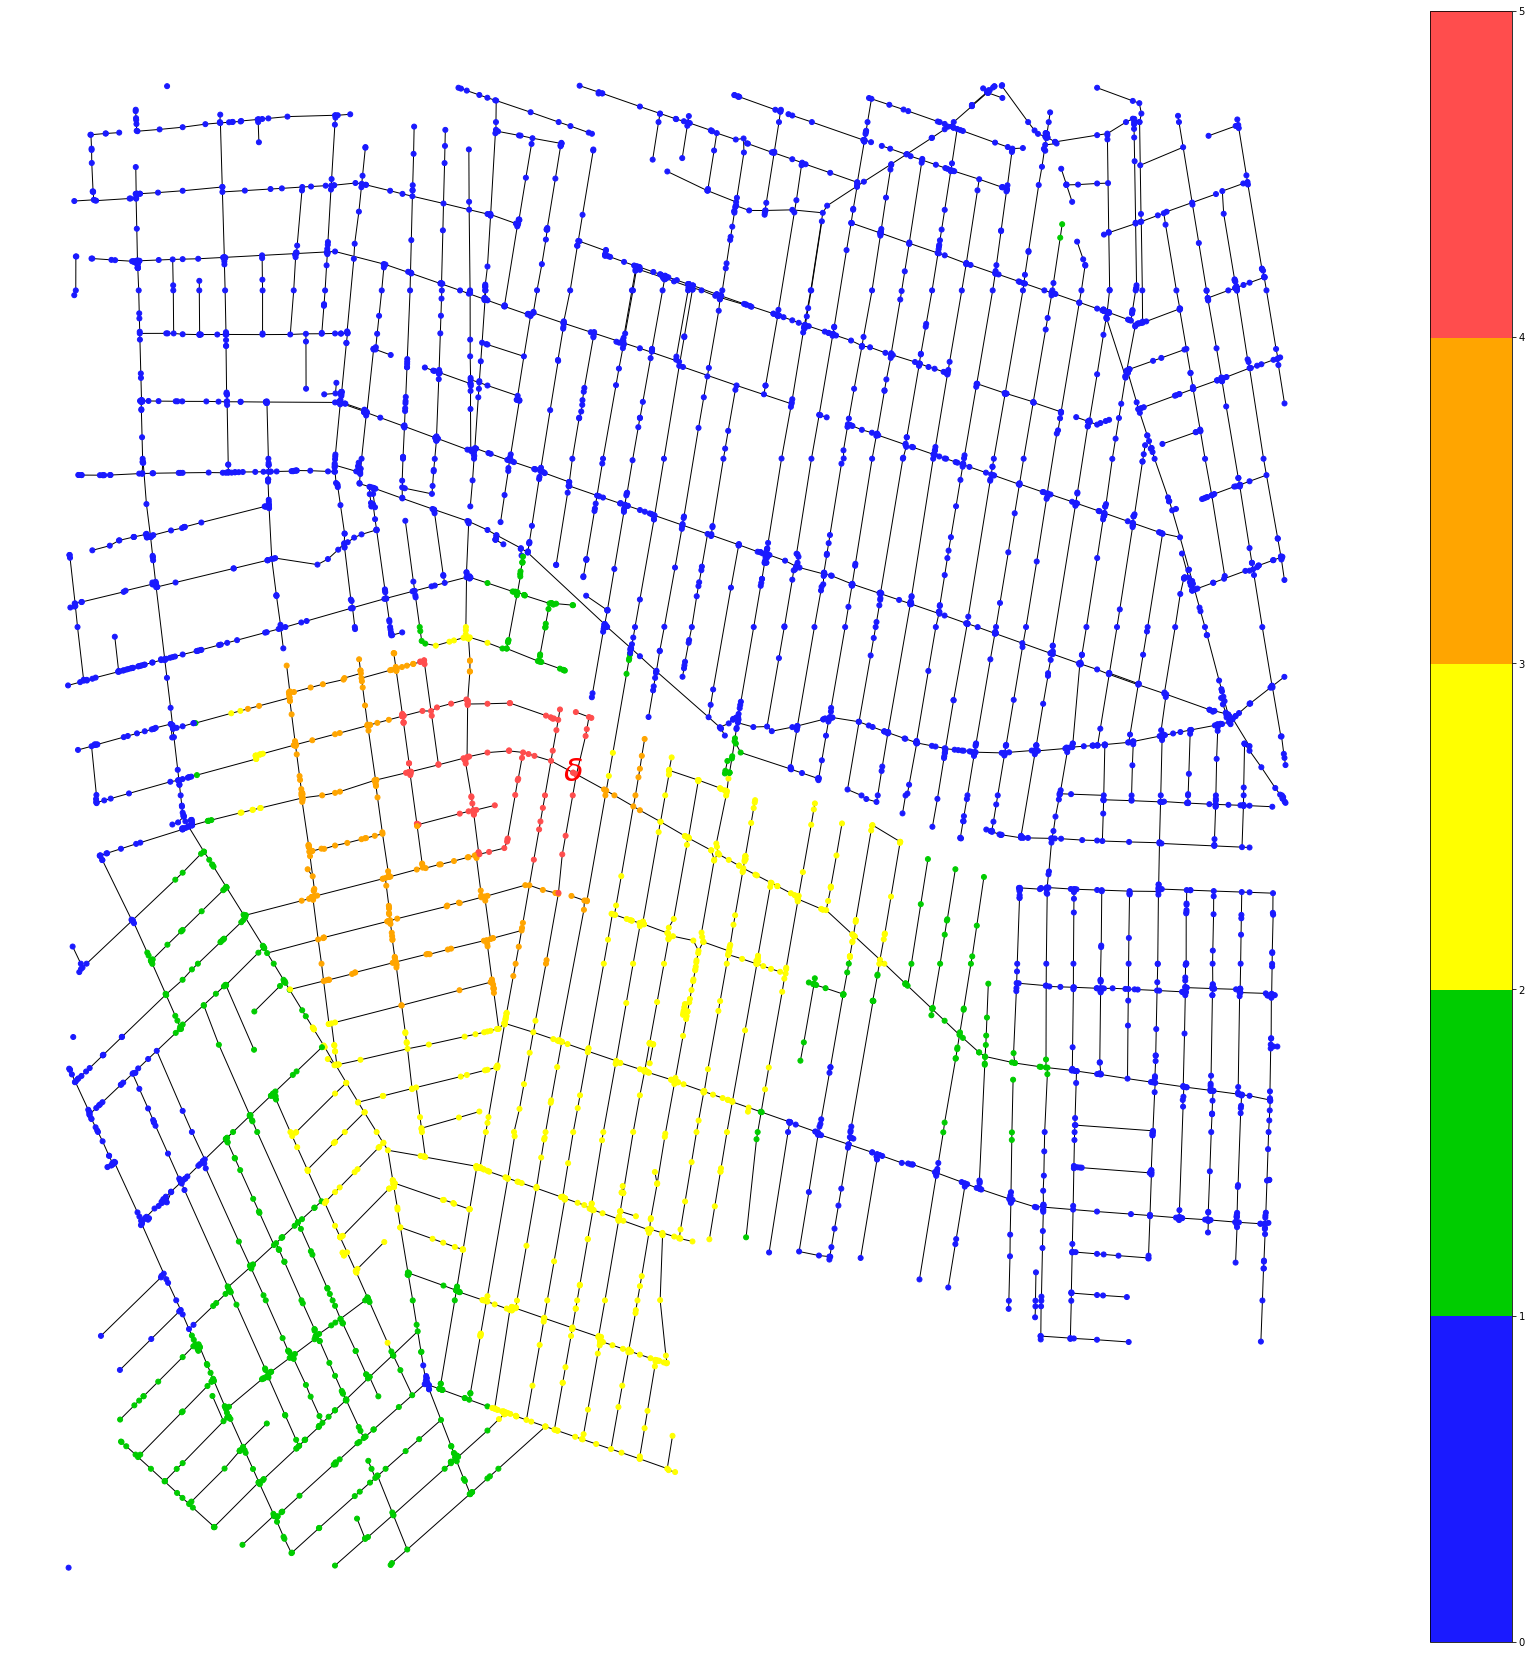

In [93]:
dirpltpath="/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_16Deg"
d2plotname = dirpltpath+"/"+name11+"_2D_velo_deviation.png"
print(d2plotname)
draw_graph_scale(color_indexed0_41 ,d2plotname)

In [ ]:
d2plotname = dirpltpath+"/"+name48_31+"_2D_velo_deviation.png"
print(d2plotname)
draw_graph_scale(color_indexed48_31,d2plotname)

In [ ]:
d2plotname = dirpltpath+"/"+name48_21+"_2D_velo_deviation.png"
print(d2plotname)
draw_graph_scale(color_indexed48_21,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg/NYU Anamoly Data_48Deg_Nodes_Leak11.csv_2D_velo_deviation.png
Current size: [30, 30]


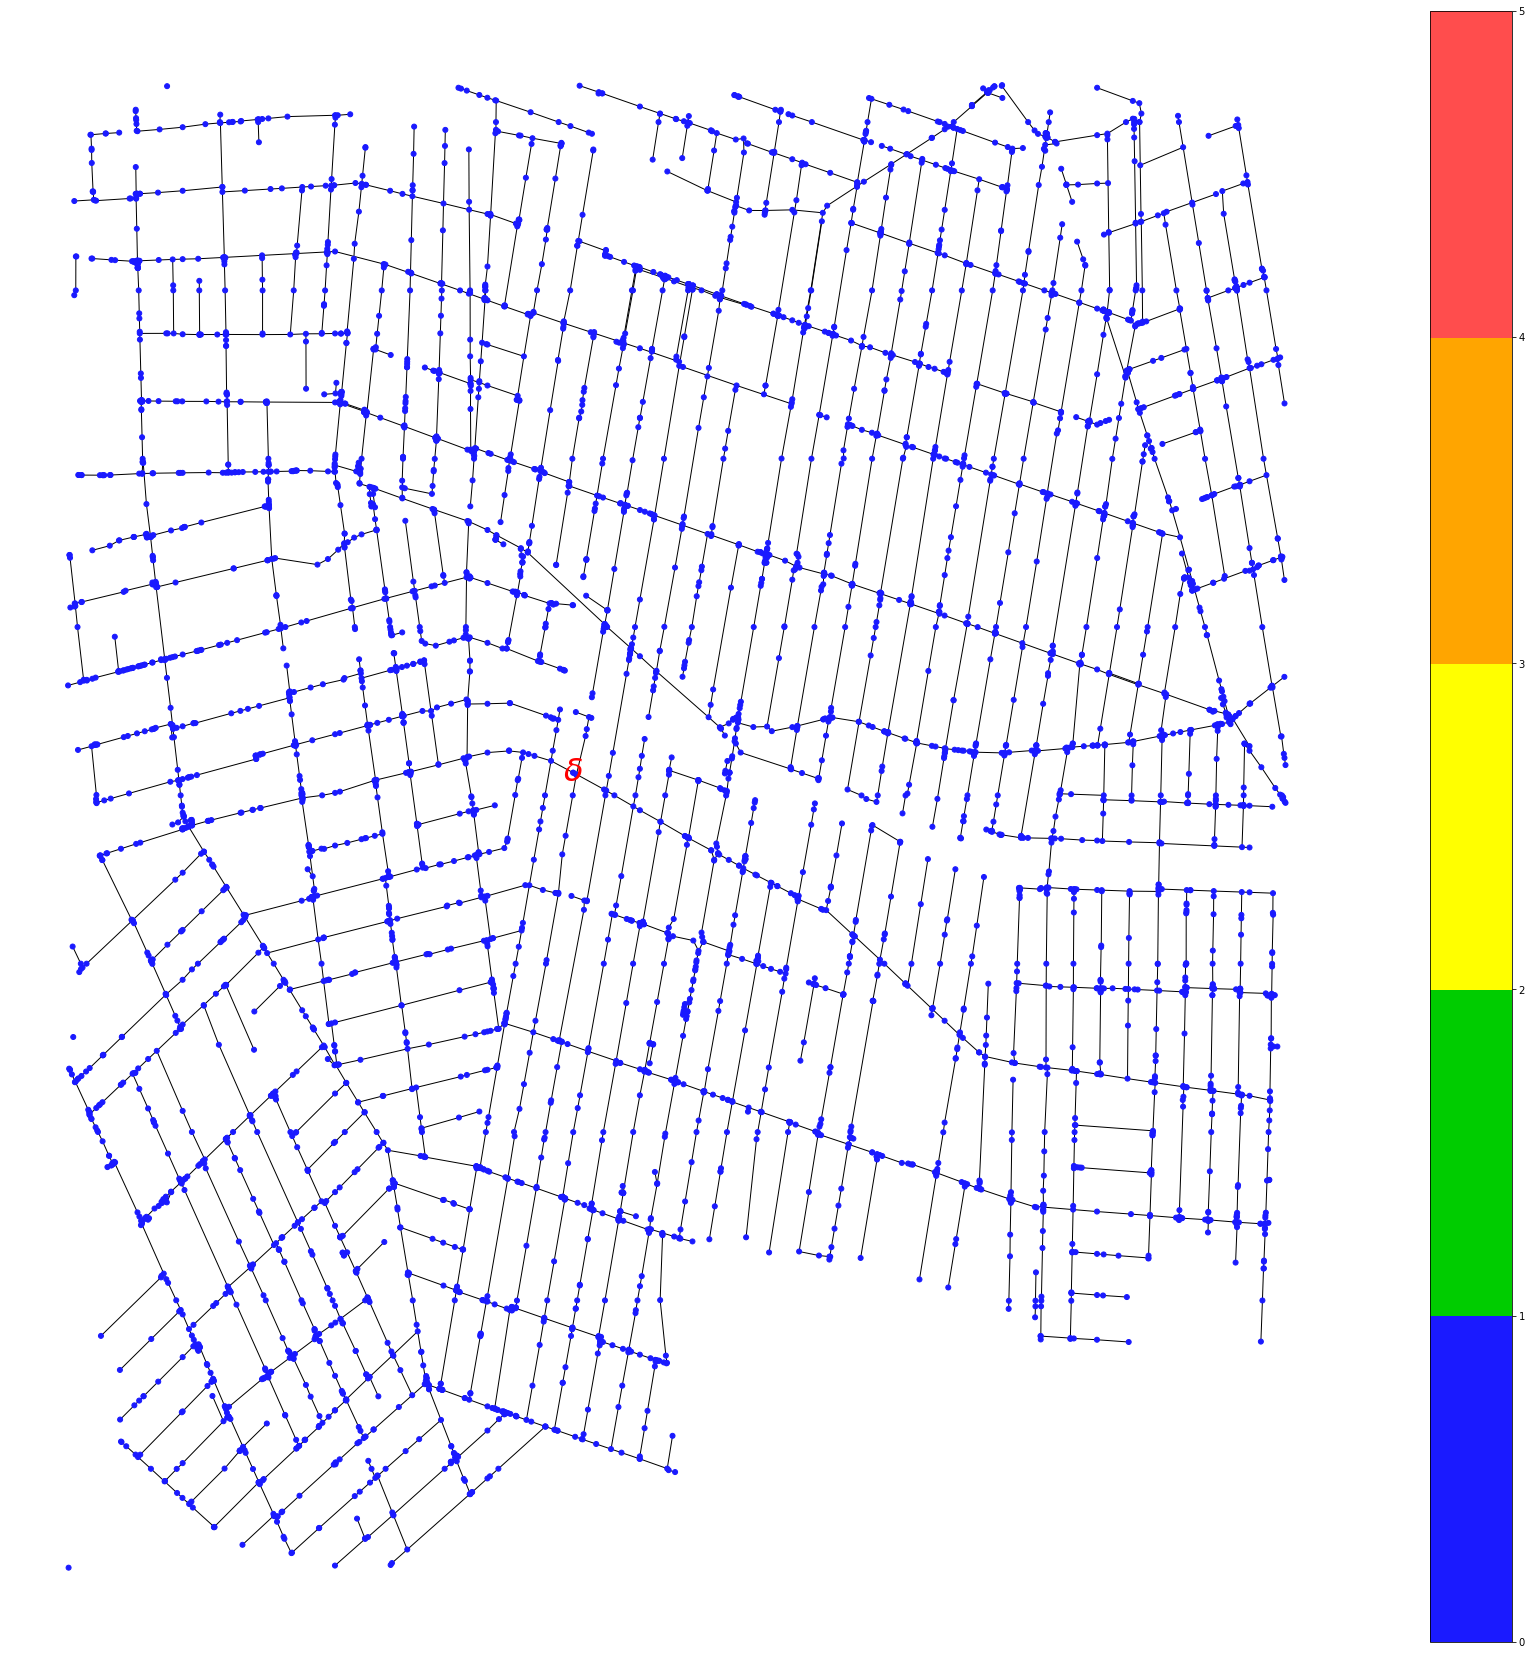

In [92]:
d2plotname = dirpltpath+"/"+name48_11+"_2D_velo_deviation.png"
print(d2plotname)
draw_graph_scale(color_indexed48_11,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg/NYU Anamoly Data_48_Nodes_Leak1_2D_velo_deviation.png
Current size: [30, 30]


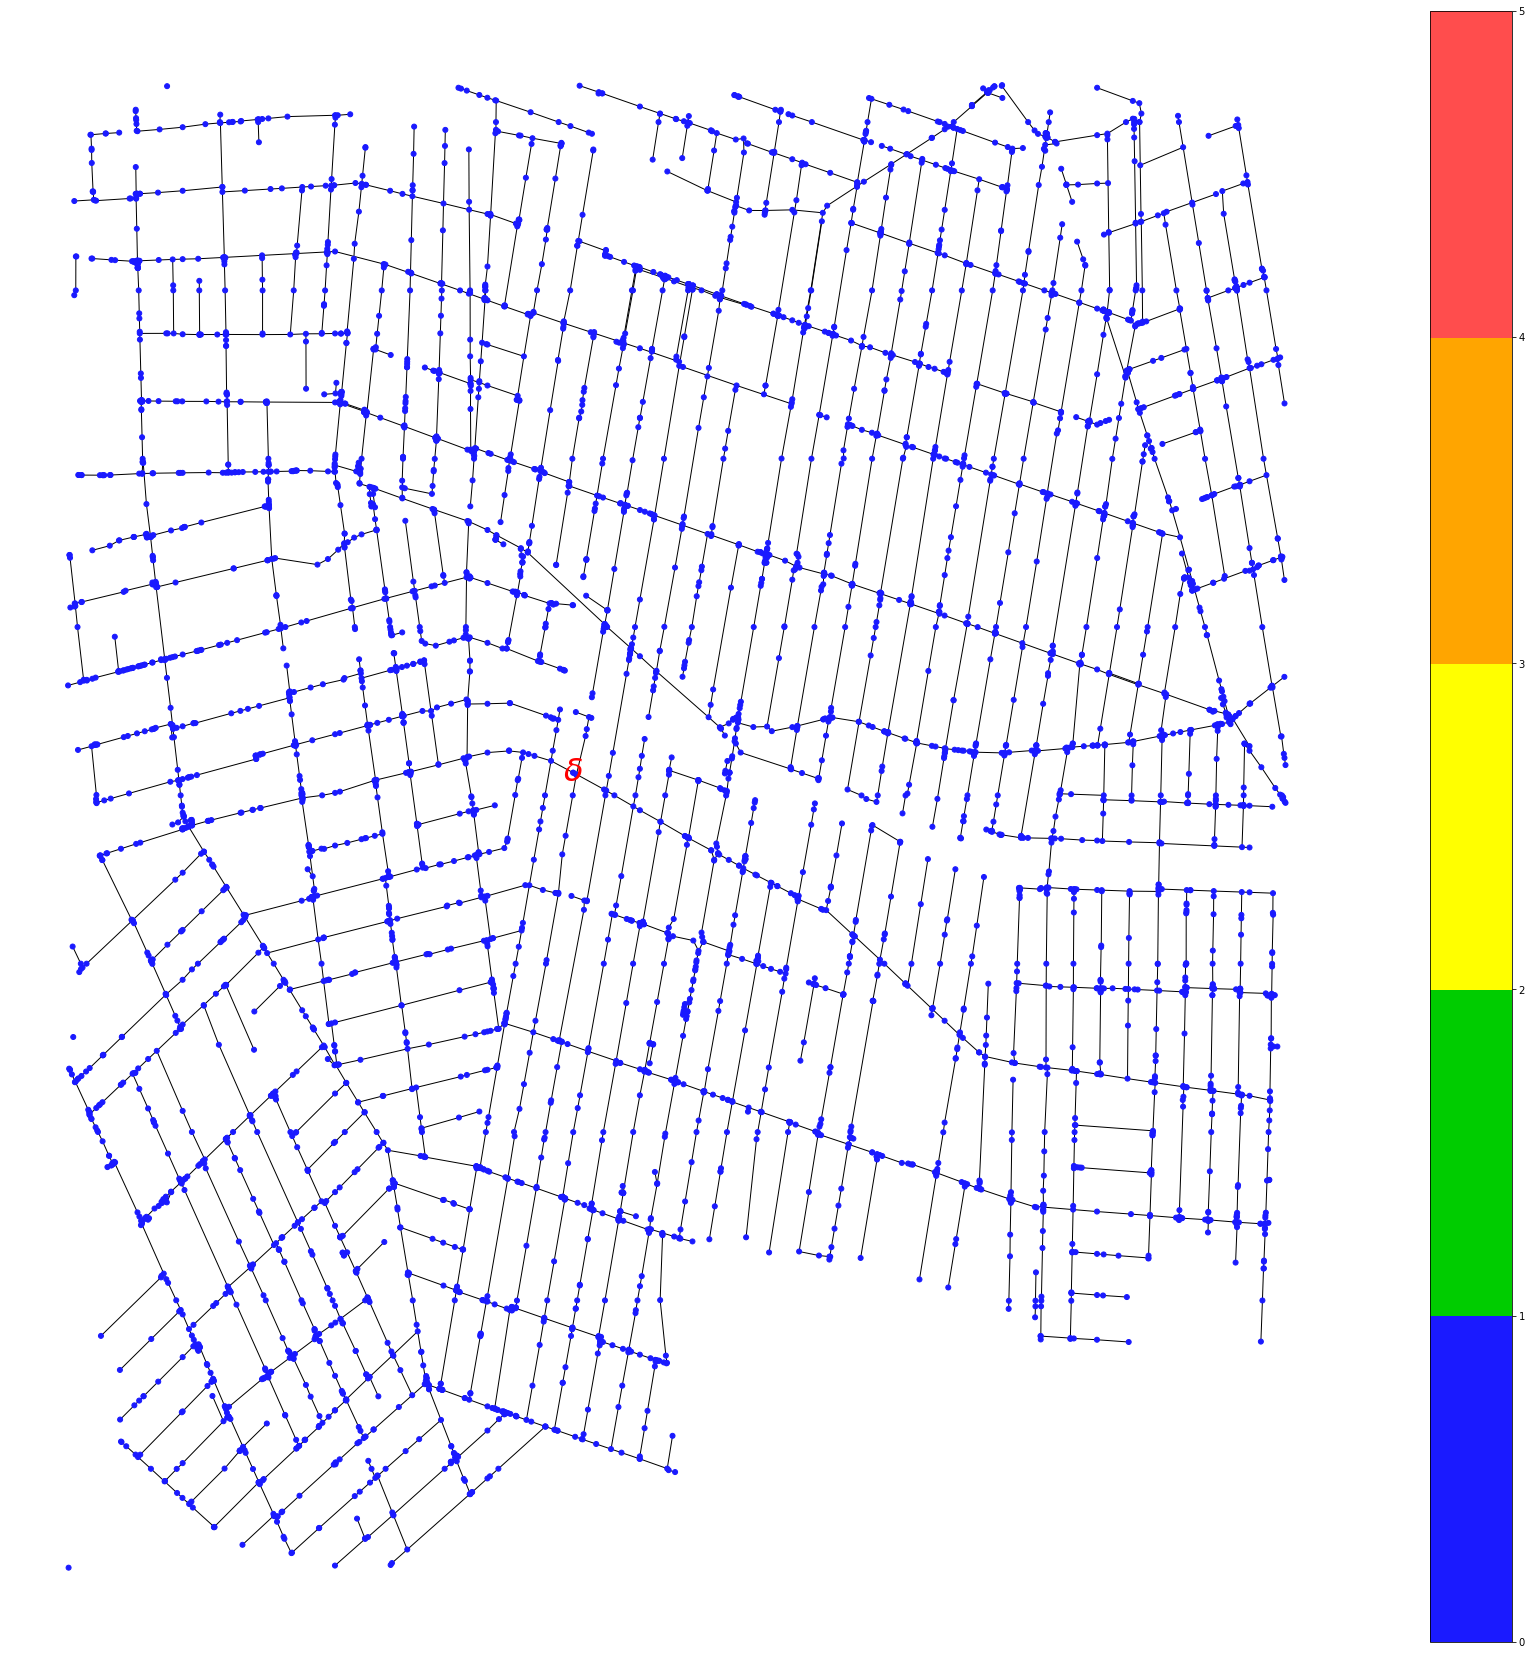

In [93]:
d2plotname = dirpltpath+"/"+"NYU Anamoly Data_48_Nodes_Leak1_2D_velo_deviation.png"
print(d2plotname)
draw_graph_scale(color_indexed48_1,d2plotname)

In [108]:
#############
#refer to https://www.idtools.com.au/3d-network-graphs-python-mplot3d-toolkit/
##############

import warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits.mplot3d import Axes3D

matplotlib_axes_logger.setLevel('ERROR')

def draw_3d_color(graphArr,d2plotname):

    cntrlnd = '0BEC50B8'

    G = nx.Graph()
    anomalyFree = "/Users/kavyaub/Documents/mySubjects/ConEdison/NYU_LeakData/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Pipes.csv"
    pipesdf0=pd.read_csv(anomalyFree)

    pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.NAME,graphArr.NodeXCoordinate,graphArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    nodepressure_dict0 = {val:item for val, item in zip(graphArr.NAME,graphArr.color)}

    d3pos_dict = defaultdict(list)
    for d in (pos_dict0, nodepressure_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)

    node_list = list(graphArr.NAME)
    G.add_nodes_from(pos_dict0.keys())
    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['pressure'] = nodepressure_dict0[n]

    for i, label in enumerate(pipesdf0['NAME']):
        pdest = pipesdf0['FacilityToNodeName'].iloc[i]
        psource = pipesdf0['FacilityFromNodeName'].iloc[i]
        pressure = pipesdf0['PipeAvePressure'].iloc[i]
        name = pipesdf0['NAME'].iloc[i]
        G.add_edge(psource, pdest, p = pressure, n = name)

    def network_plot_3D(G, angle, save=True):
        
        lower = 0
        upper = 5
        #colors = plt.cm.jet((graphArr.PressureDeviation-lower)/(upper-lower))
        
        #tp2 = (graphArr.PressureDeviation-lower)/(upper-lower)
        colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
        #cmap= matplotlib.colors.ListedColormap(colors)
        #cmap.set_under("crimson")
        #cmap.set_over("w")
        #norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)
        #mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
        #cc = cmap(tp2)


        # 3D network plot
        with plt.style.context(('ggplot')):

            fig = plt.figure(figsize=(30,30))
            ax = Axes3D(fig)
            ax.set_xlabel('x-coordinates',fontsize=30)
            ax.set_ylabel('y-coordinates',fontsize=30)
            ax.set_zlabel('Pressure Deviation', fontsize=30)
            ax.set_zlim(lower,upper)


            # Loop on the pos dictionary to extract the x,y,z coordinates of each node
            ctr=0
            for key, value in d3pos_dict0.items():
                xi = value[0][0]
                yi = value[0][1]
                zi = value[1]

                # Scatter plot
                ax.scatter(xi, yi, zi,c=colors[zi], edgecolors='k', alpha=0.5, s=80,cmap=colors)
                ctr=ctr+1

            # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
            # Those two points are the extrema of the line to be plotted
            for i,j in enumerate(G.edges()):
                x = np.array((d3pos_dict0[j[0]][0][0], d3pos_dict0[j[1]][0][0]))
                y = np.array((d3pos_dict0[j[0]][0][1], d3pos_dict0[j[1]][0][1]))
                z = np.array((d3pos_dict0[j[0]][1], d3pos_dict0[j[1]][1]))

            # Plot the connecting lines
                ax.plot(x, y, z, c='black',alpha=0.5)

        # Set the initial view
        angleVerticle = 30
        ax.view_init(angleVerticle, angle)
        ax.zaxis.set_tick_params(labelsize='22',pad=17)
        ax.zaxis.labelpad = 40
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 20
        # Hide the axes
        #ax.set_axis_off()

        if save is not False:
            #plt.savefig("/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/Leak_1_ZeroDegrees.png")
            plt.savefig(d2plotname)
            plt.show()
        else:
            plt.show()

        return

    network_plot_3D(G, 60)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_16Deg/NYU Anamoly Data_16Deg_Nodes_Leak11.csv_3D_velo_deviation.png


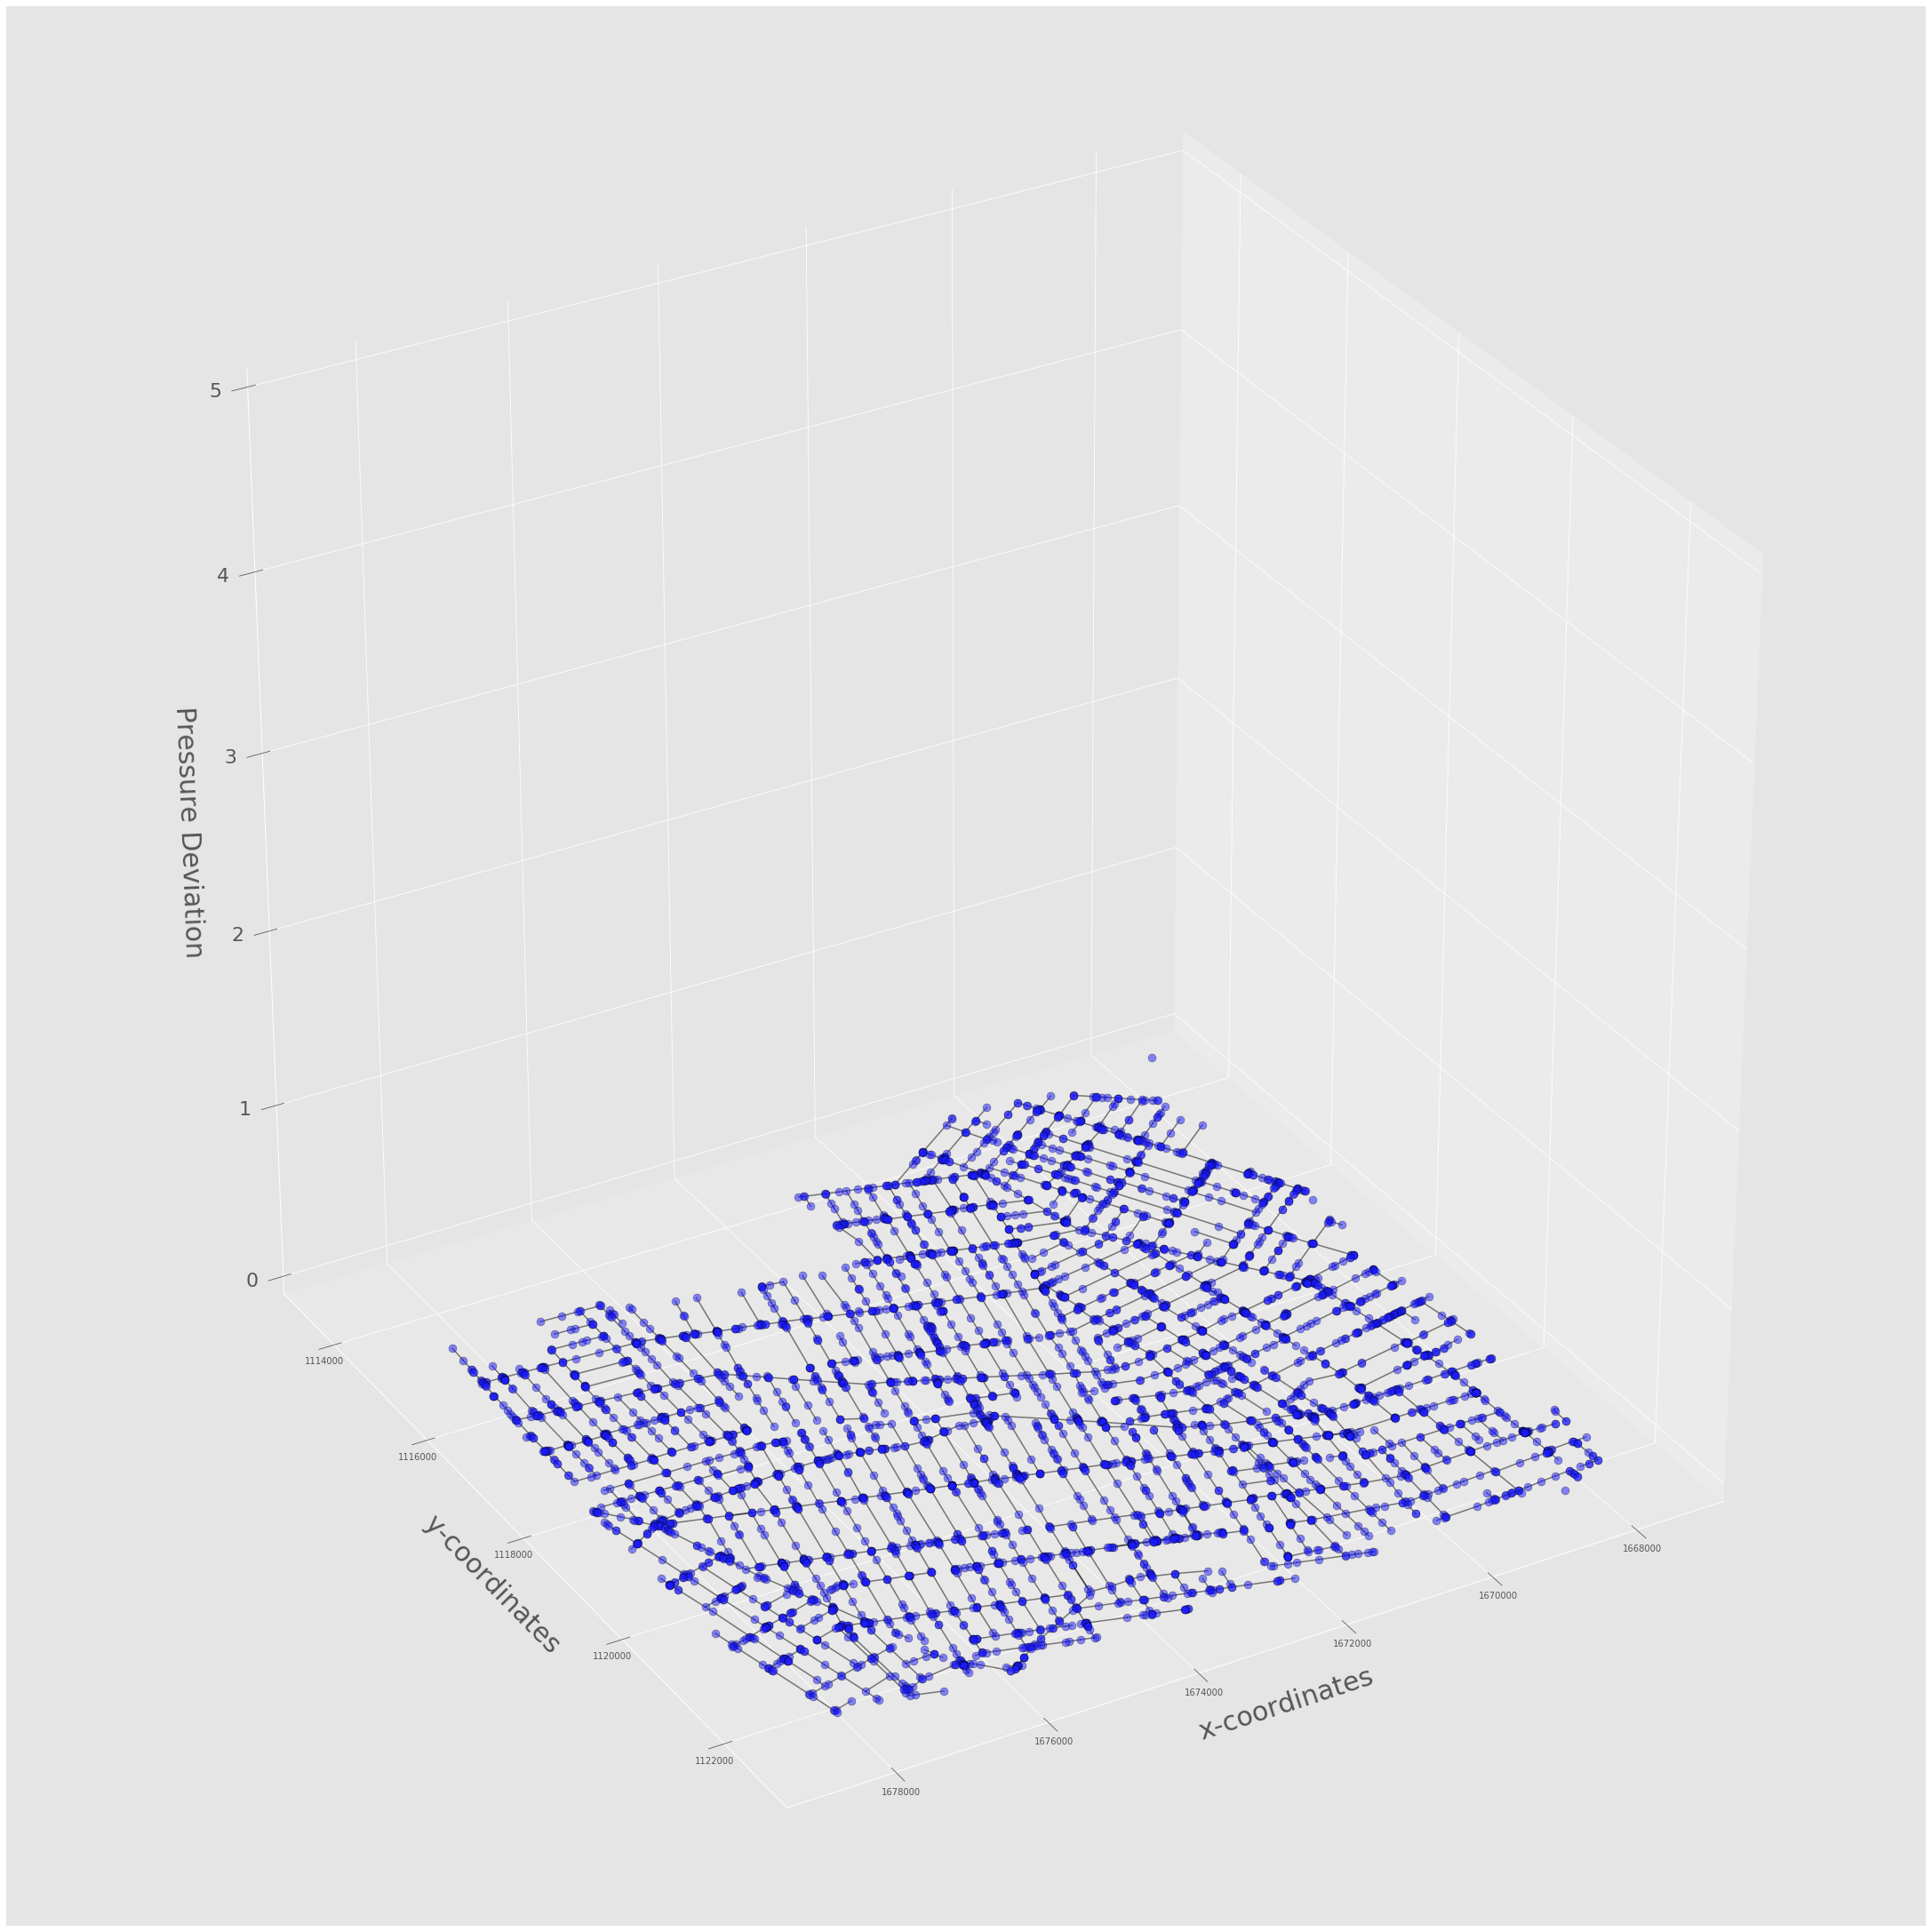

In [50]:
d2plotname = dirpltpath+"/"+name11+"_3D_velo_deviation.png"
print(d2plotname)
draw_3d_color(color_indexed11,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg/NYU Anamoly Data_48Deg_Nodes_Leak21.csv_3D_velo_deviation.png


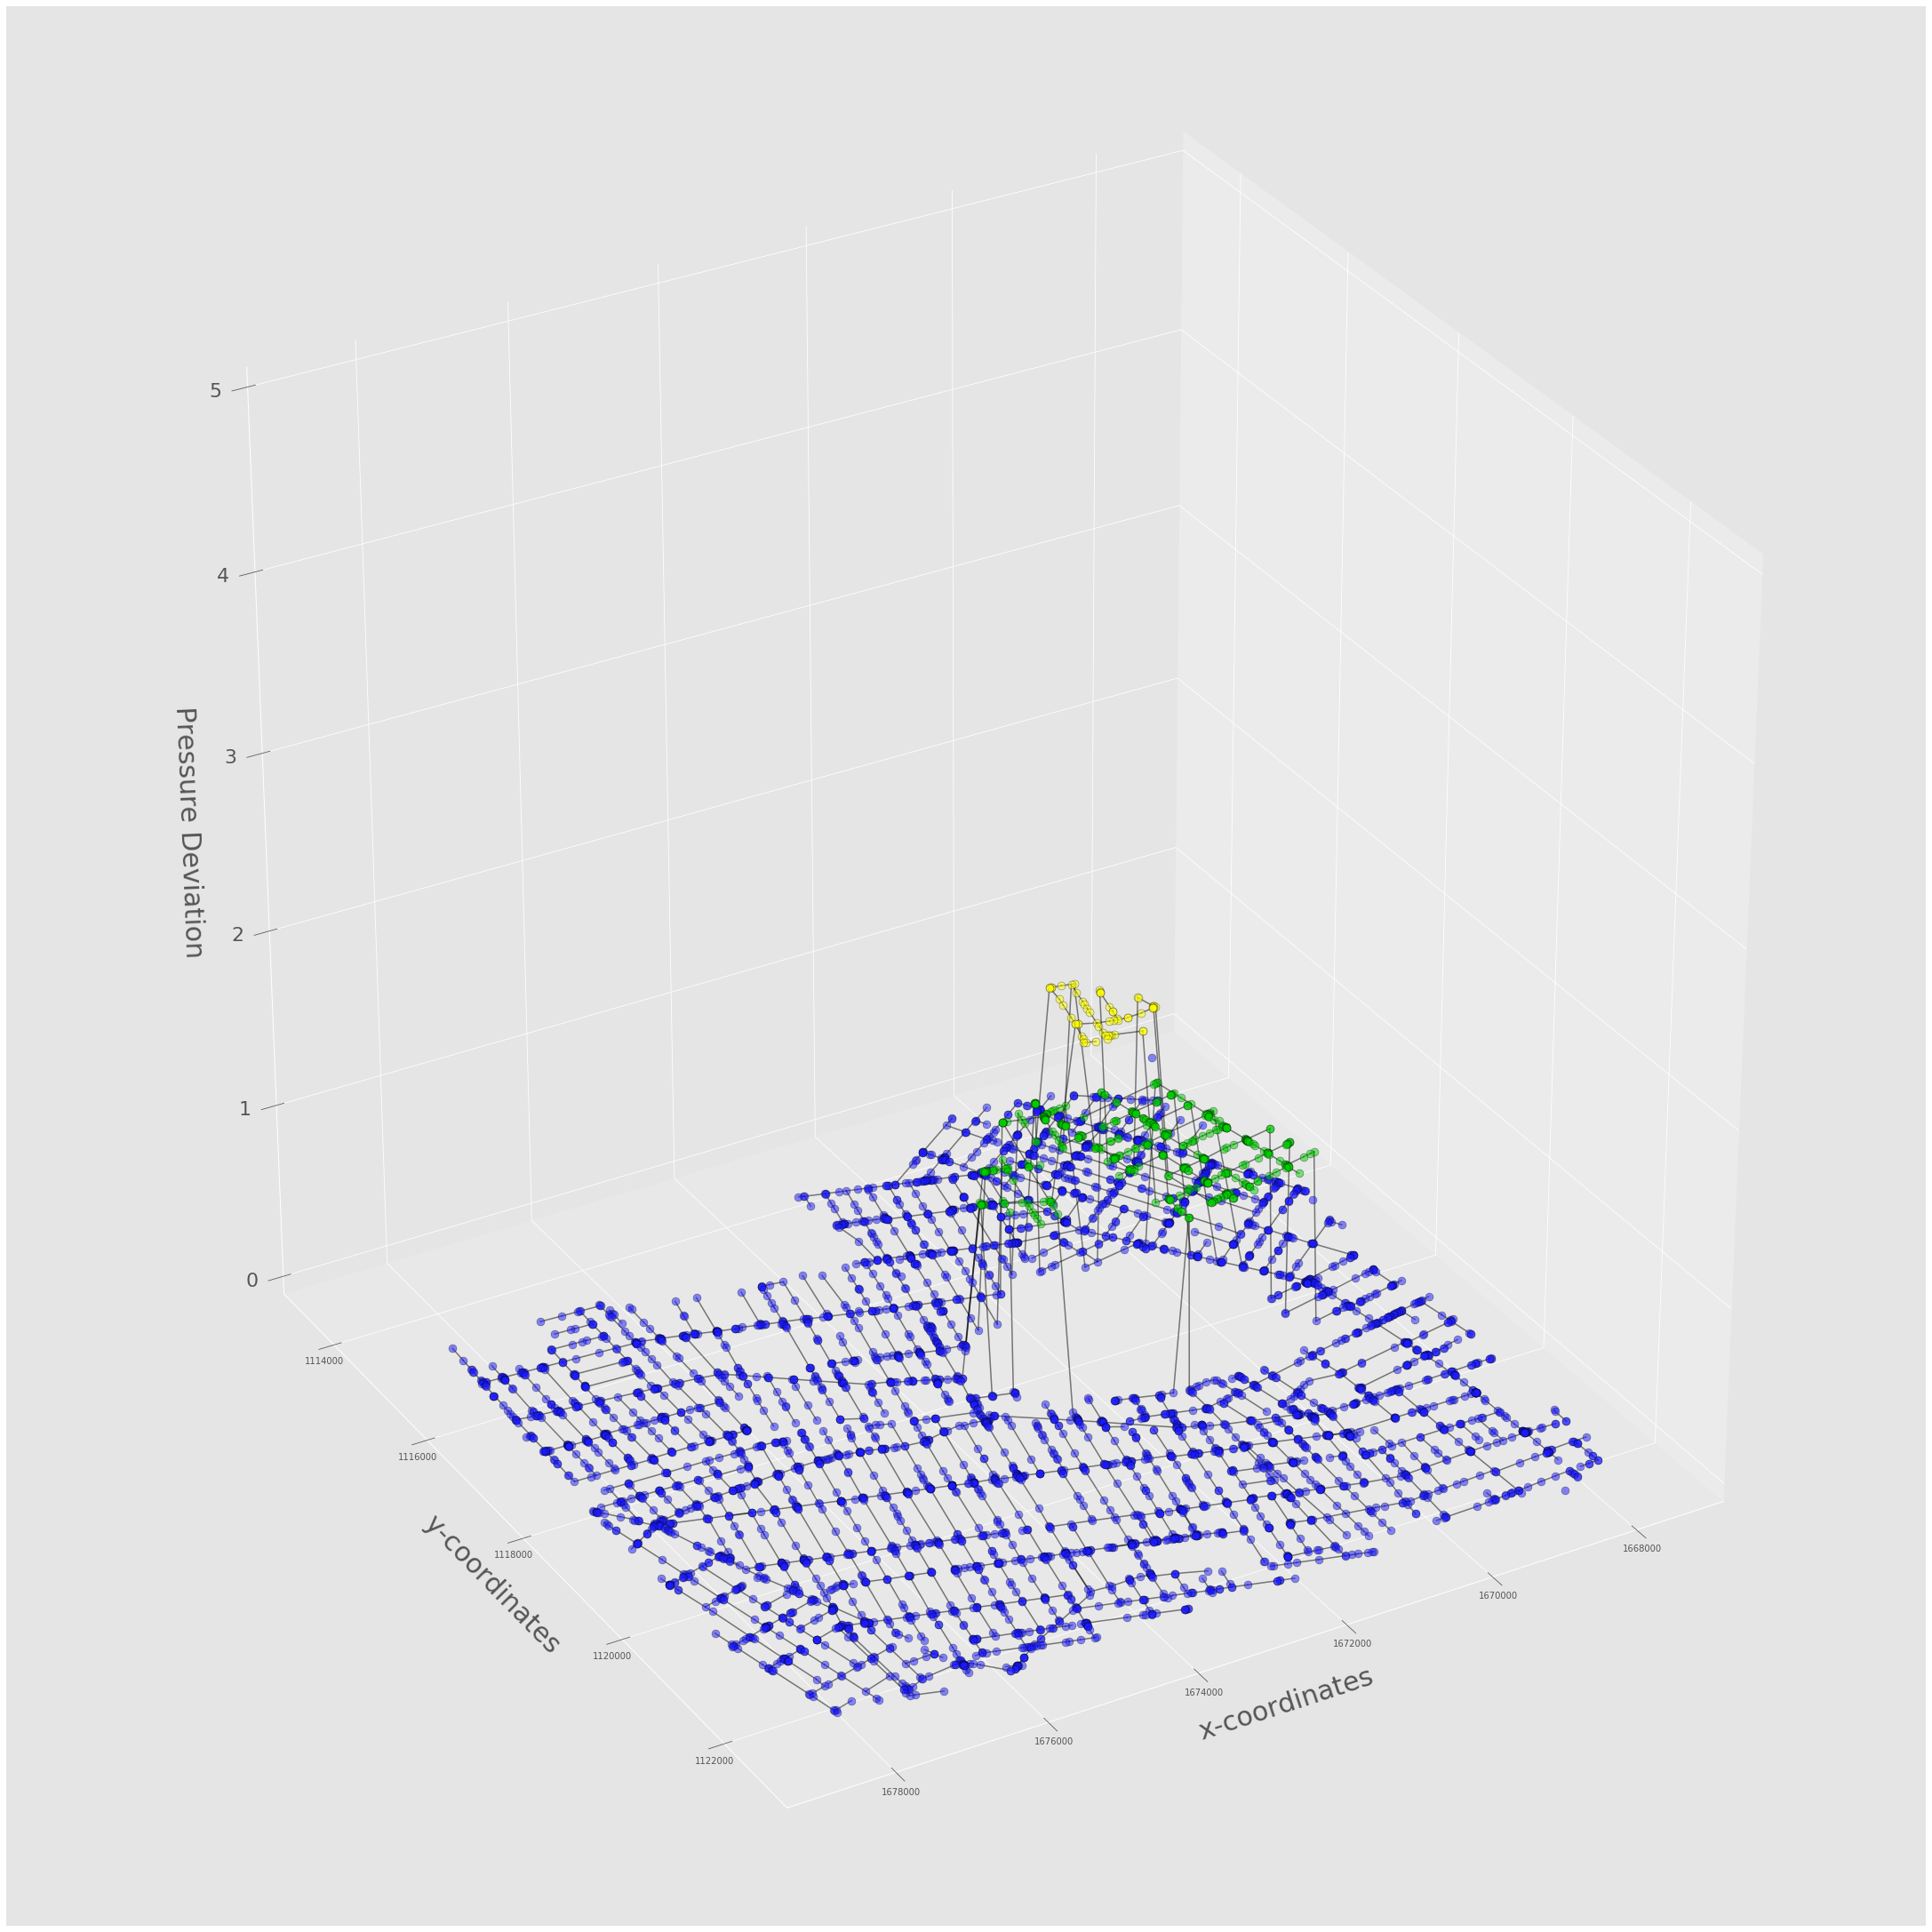

In [96]:
d2plotname = dirpltpath+"/"+name48_21+"_3D_velo_deviation.png"
print(d2plotname)
draw_3d_color(color_indexed48_21,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg/NYU Anamoly Data_48Deg_Nodes_Leak11.csv_3D_velo_deviation.png


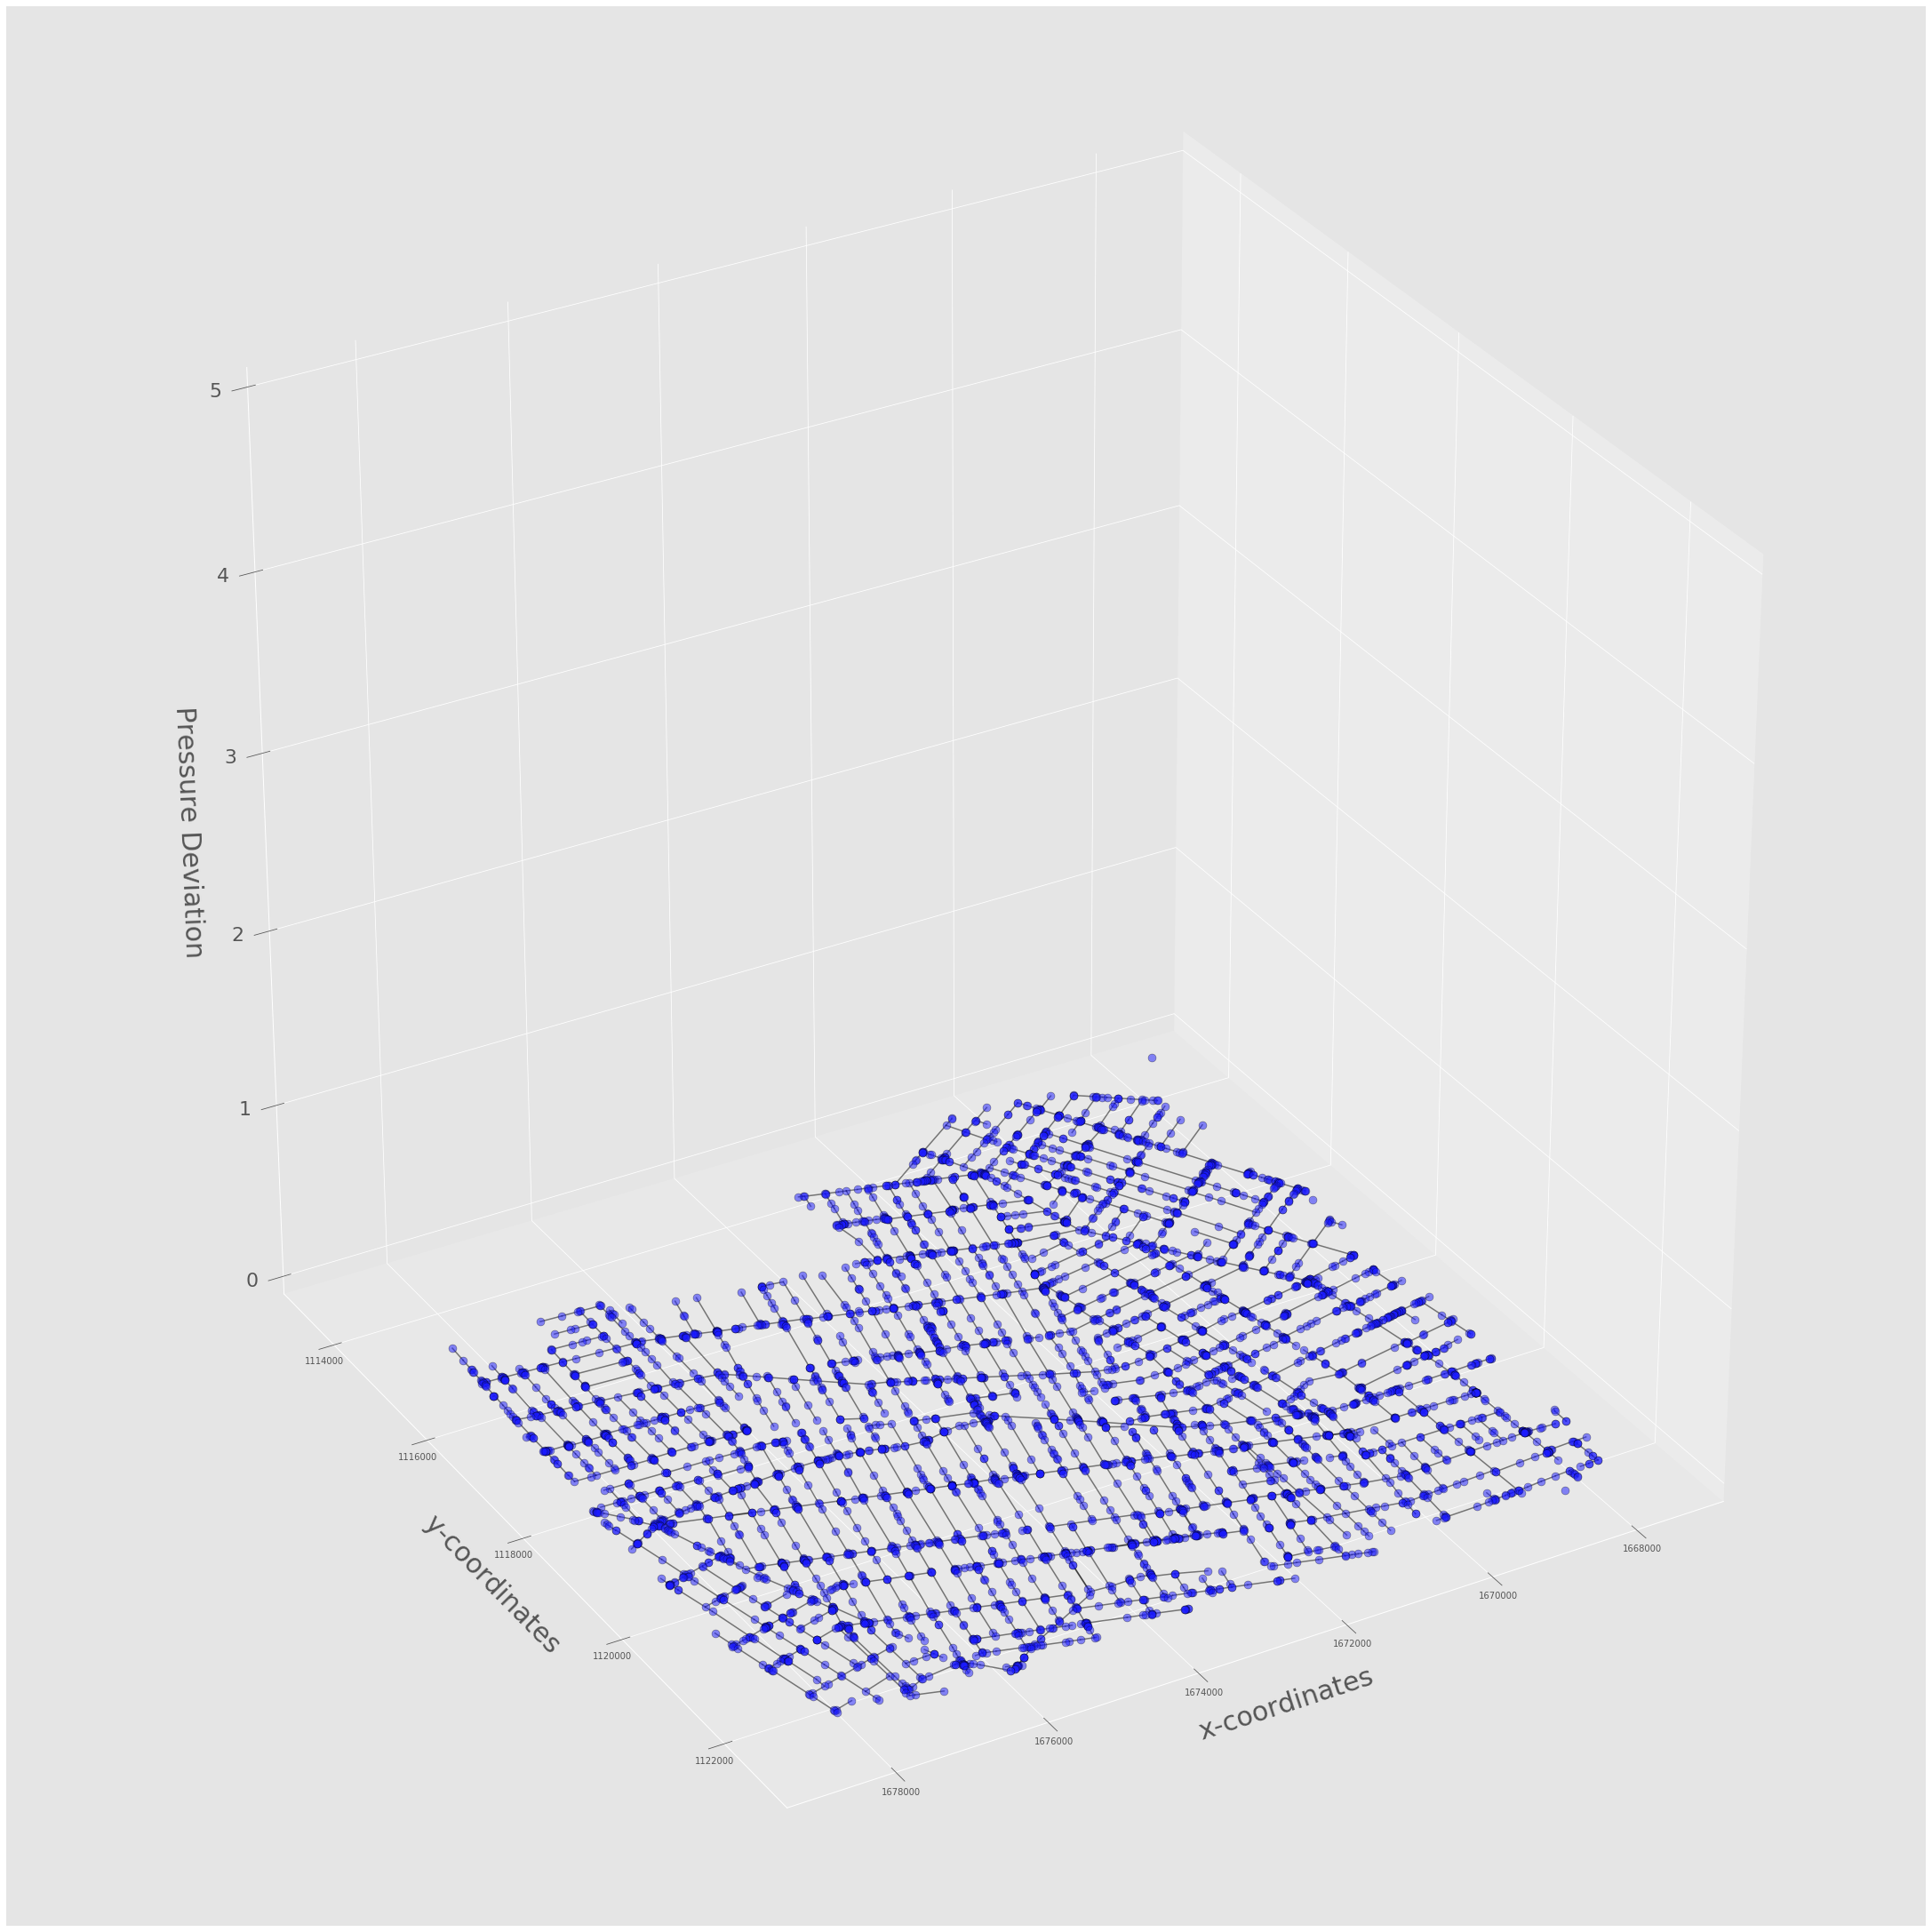

In [97]:
d2plotname = dirpltpath+"/"+name48_11+"_3D_velo_deviation.png"
print(d2plotname)
draw_3d_color(color_indexed48_11,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg/NYU Anamoly Data_48Deg_Nodes_Leak41.csv_3D_velo_deviation.png


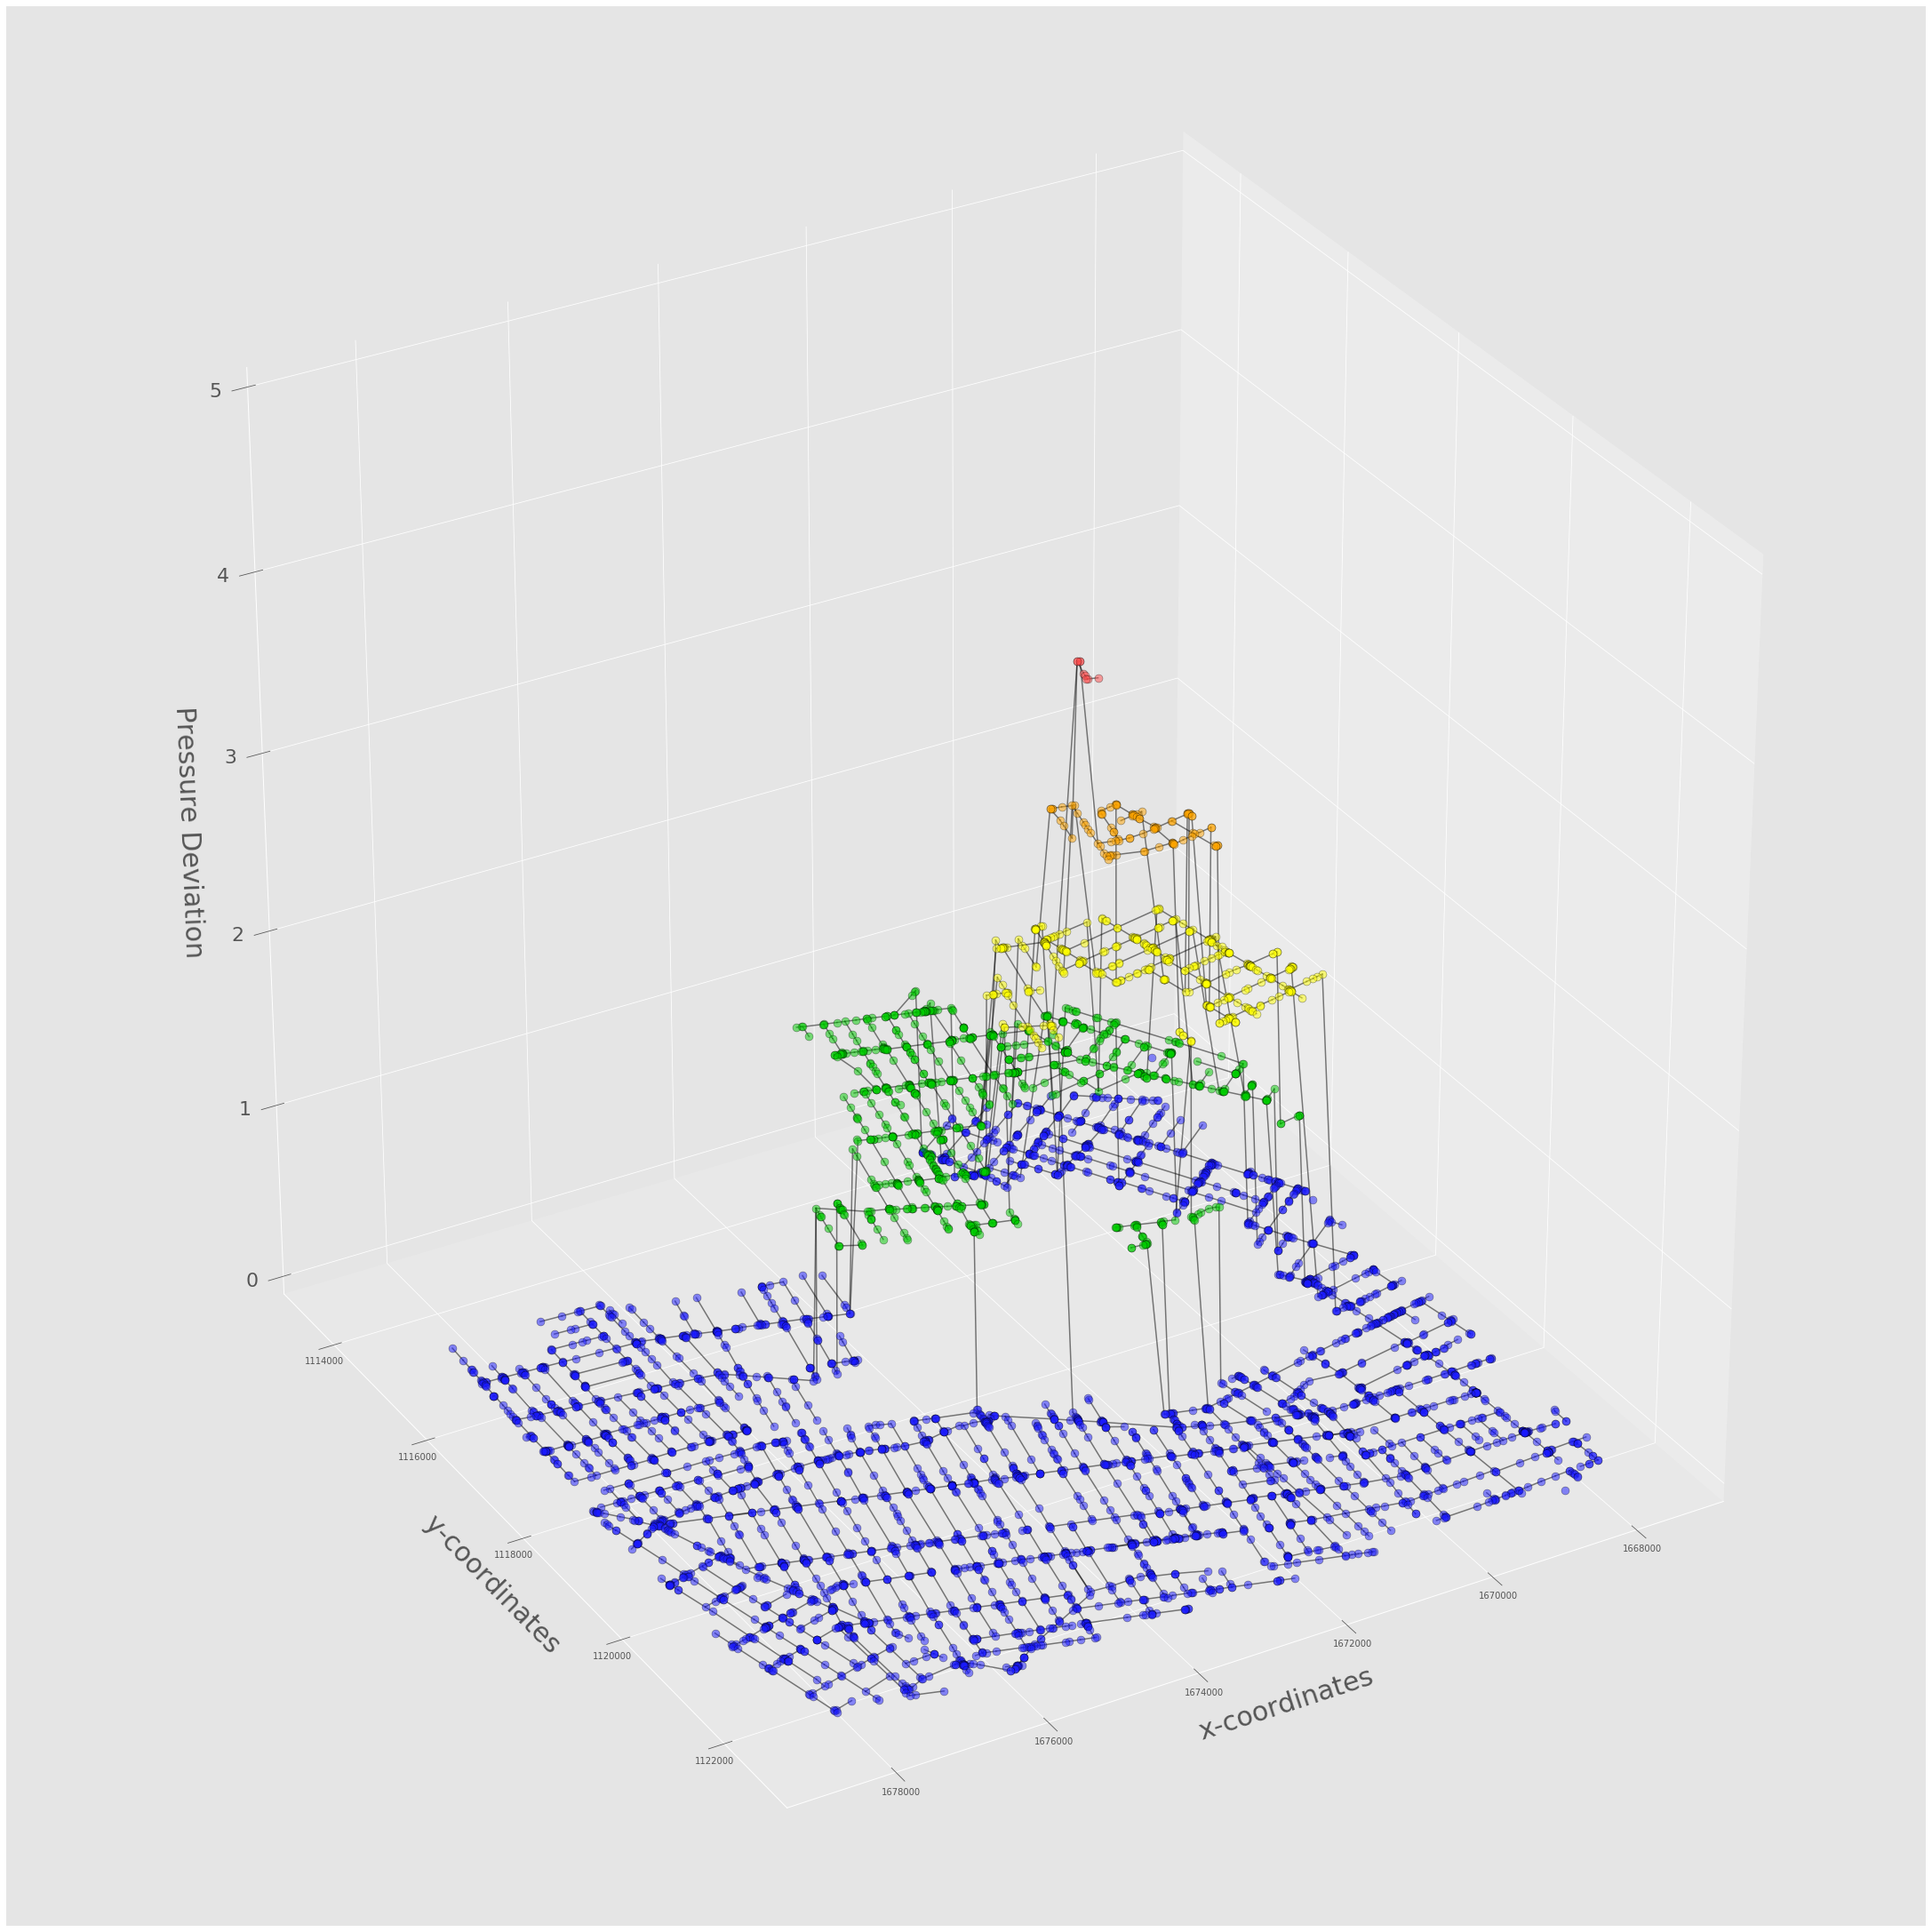

In [98]:
d2plotname = dirpltpath+"/"+name48_41+"_3D_velo_deviation.png"
print(d2plotname)
draw_3d_color(color_indexed48_41,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsNodes_48Deg/NYU Anamoly Data_48_Nodes_Leak1_3D_velo_deviation.png


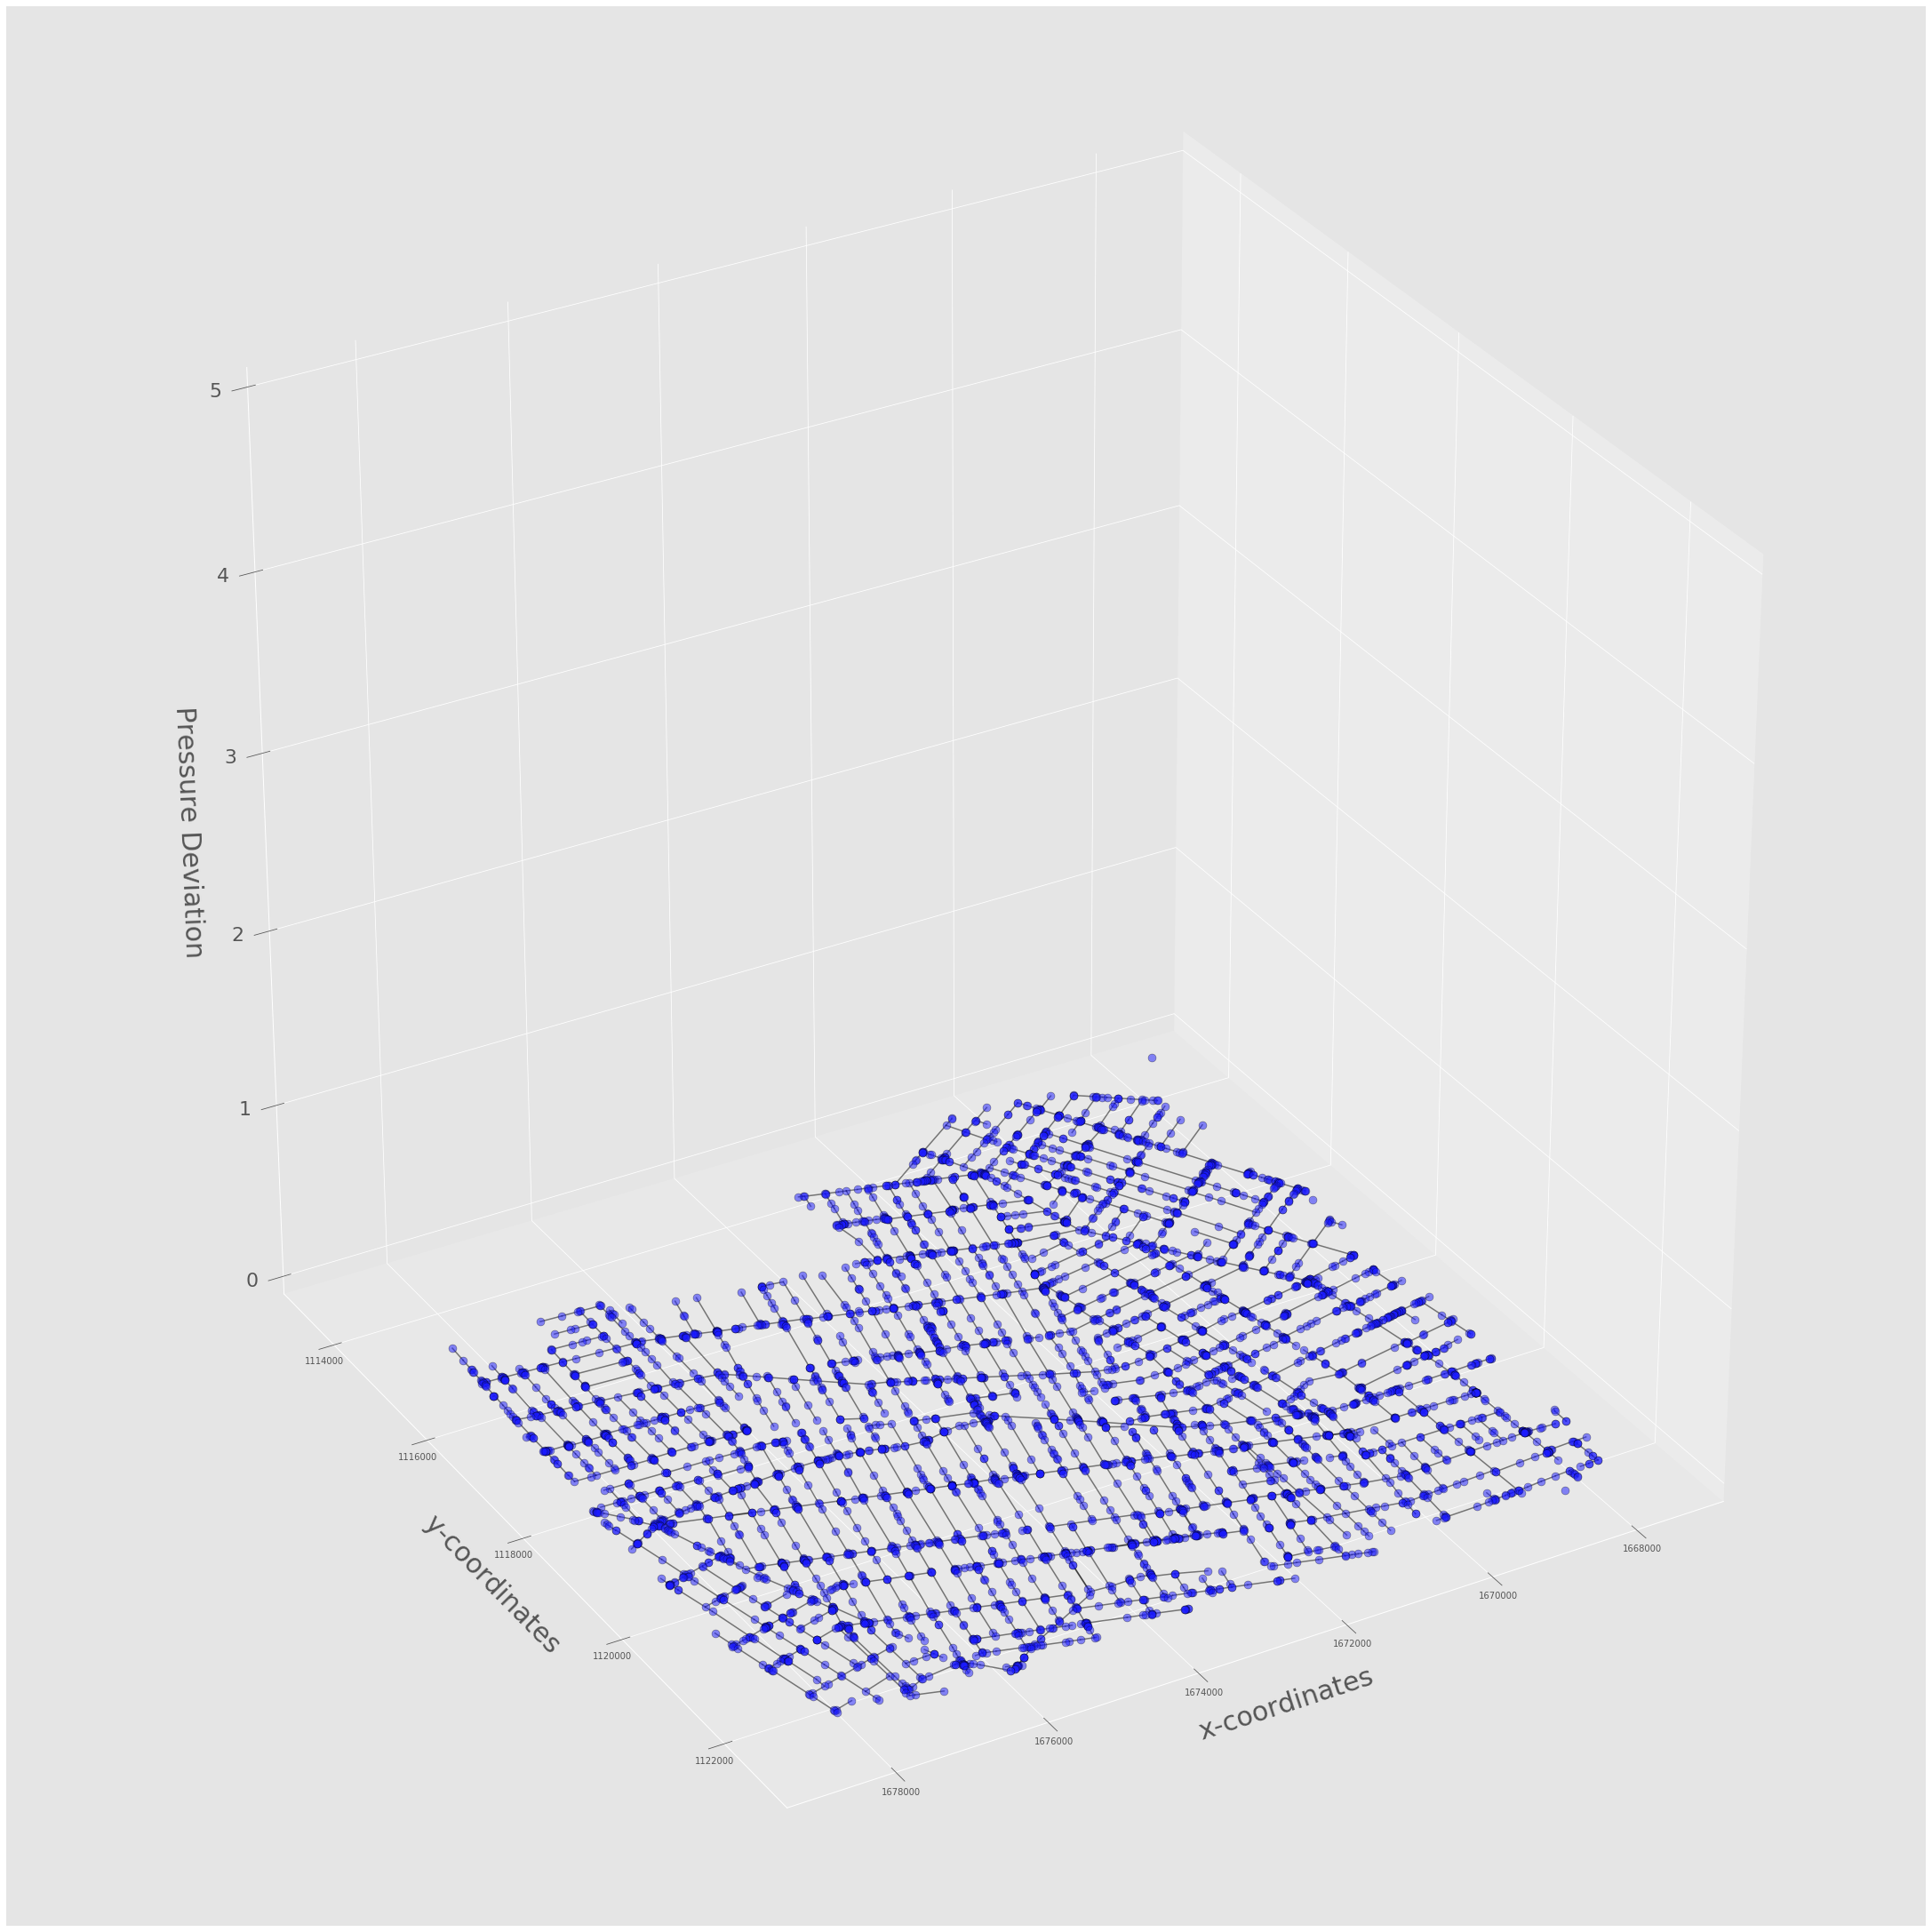

In [99]:
d2plotname = dirpltpath+"/"+"NYU Anamoly Data_48_Nodes_Leak1_3D_velo_deviation.png"
print(d2plotname)
draw_3d_color(color_indexed48_1,d2plotname)

In [40]:
def save_data_file(temp):
    if temp == 16:
        arr1=color_indexed1
        arr11=color_indexed11
        arr21=color_indexed21
        arr31=color_indexed31
        arr41=color_indexed41
    elif temp==0:
        arr1=color_indexed0_1
        arr11=color_indexed0_11
        arr21=color_indexed0_21
        arr31=color_indexed0_31
        arr41=color_indexed0_41
    elif temp==32:
        arr1=color_indexed32_1
        arr11=color_indexed32_11
        arr21=color_indexed32_21
        arr31=color_indexed32_31
        arr41=color_indexed32_41
    elif temp==48:
        arr1=color_indexed48_1
        arr11=color_indexed48_11
        arr21=color_indexed48_21
        arr31=color_indexed48_31
        arr41=color_indexed48_41
    elif temp==64:
        arr1=color_indexed64_1
        arr11=color_indexed64_11
        arr21=color_indexed64_21
        arr31=color_indexed64_31
        arr41=color_indexed64_41
    day = np.hstack([[0]*arr1.NAME.size,[1]*arr1.NAME.size,[2]*arr1.NAME.size,[3]*arr1.NAME.size,[4]*arr1.NAME.size])
    p = np.hstack([arr1.NodePressure,arr11.NodePressure,arr21.NodePressure,arr31.NodePressure,arr41.NodePressure])
    pd = np.hstack([arr1.PressureDeviation,arr11.PressureDeviation,arr21.PressureDeviation,arr31.PressureDeviation,arr41.PressureDeviation])
    names = np.hstack([res1.NAME,res11.NAME,res21.NAME,res31.NAME,res41.NAME])
    temps=np.hstack([[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size])
    color=np.hstack([arr1.color,arr11.color,arr21.color,arr31.color,arr41.color])
    final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T])
    
    #np.savetxt("data_pipes_vel"+str(temp)+".txt", final_file.T,fmt='%s')
    #np.savetxt("data_pipes_vel_ind_"+str(temp)+".txt", final_file[2],fmt='%s')
    
    ff = np.vstack([names,p,pd,color,day])
    np.savetxt("./data/nodes/full/data_"+str(temp)+".csv",ff,delimiter=",",fmt='%s')

    
    labels = np.hstack([[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size])
    labels[np.where(final_file[4]>=1)]=1
    targets=labels
    np.savetxt("./data/nodes/full/target_"+str(temp)+".txt", targets.T,fmt='%s')
    
    return final_file, targets


In [41]:
def save_data_file_500(temp):
    if temp == 16:
        arr1=color_indexed1_500
        arr11=color_indexed11_500
        arr21=color_indexed21_500
        arr31=color_indexed31_500
        arr41=color_indexed41_500
    elif temp==0:
        arr1=color_indexed0_1_500
        arr11=color_indexed0_11_500
        arr21=color_indexed0_21_500
        arr31=color_indexed0_31_500
        arr41=color_indexed0_41_500
    elif temp==32:
        arr1=color_indexed32_1_500
        arr11=color_indexed32_11_500
        arr21=color_indexed32_21_500
        arr31=color_indexed32_31_500
        arr41=color_indexed32_41_500
    elif temp==48:
        arr1=color_indexed48_1_500
        arr11=color_indexed48_11_500
        arr21=color_indexed48_21_500
        arr31=color_indexed48_31_500
        arr41=color_indexed48_41_500
    elif temp==64:
        arr1=color_indexed64_1_500
        arr11=color_indexed64_11_500
        arr21=color_indexed64_21_500
        arr31=color_indexed64_31_500
        arr41=color_indexed64_41_500
        
    day = np.hstack([[0]*arr1.NAME.size,[1]*arr1.NAME.size,[2]*arr1.NAME.size,[3]*arr1.NAME.size,[4]*arr1.NAME.size])
    p = np.hstack([arr1.NodePressure,arr11.NodePressure,arr21.NodePressure,arr31.NodePressure,arr41.NodePressure])
    pd = np.hstack([arr1.PressureDeviation,arr11.PressureDeviation,arr21.PressureDeviation,arr31.PressureDeviation,arr41.PressureDeviation])
    names = np.hstack([res1_500.NAME,res11_500.NAME,res21_500.NAME,res31_500.NAME,res41_500.NAME])
    temps=np.hstack([[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size])
    color=np.hstack([arr1.color,arr11.color,arr21.color,arr31.color,arr41.color])
    final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T])
    ff = np.vstack([p,pd,day])
    #final_file.to_excel("./data/data_nodes_press_500_"+str(temp)+".xlsx")
    #np.savetxt("data_pipes_vel_500"+str(temp)+".txt", final_file.T,fmt='%s')
    np.savetxt("./data/nodes/data_nodes_press_500_"+str(temp)+".csv",ff,delimiter=",",fmt='%s')
    
    
    labels = np.hstack([[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size])
    labels[np.where(final_file[4]==4)]=1
    targets=labels
    
    #np.savetxt("target_nodes_500"+str(temp)+".txt", targets.T,fmt='%s')
    np.savetxt("./data/nodes/target_nodes_500_lab4_"+str(temp)+".csv",targets,delimiter=",",fmt='%s')
    
    return final_file, targets



In [42]:
final_file_0_500,target_0_500 = save_data_file_500(0)
final_file_16_500,target_16_500 = save_data_file_500(16)
final_file_32_500,target_32_500 = save_data_file_500(32)
final_file_48_500,target_48_500 = save_data_file_500(48)
final_file_64_500,target_64_500 = save_data_file_500(64)

In [43]:
#pd.read_csv("./data/data_nodes_press_500_64.csv", header=None).T.to_csv("./data/data_nodes_press_500_64.csv", header=False, index=False)

In [44]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import svm

In [45]:
final_file_0,target_0 = save_data_file(0)
final_file_16,target_16 = save_data_file(16)
final_file_32,target_32= save_data_file(32)
final_file_48,target_48 = save_data_file(48)
final_file_64,target_64 = save_data_file(64)

final_file_0_500,target_0_500 = save_data_file_500(0)
final_file_16_500,target_16_500 = save_data_file_500(16)
final_file_32_500,target_32_500 = save_data_file_500(32)
final_file_48_500,target_48_500 = save_data_file_500(48)
final_file_64_500,target_64_500 = save_data_file_500(64)


In [46]:
consolidated_file = np.concatenate((final_file_0,final_file_16,final_file_32,final_file_48,final_file_64),axis=1)
consolidated_target = np.concatenate((target_0,target_16,target_32,target_48,target_64))


In [47]:

#ros = RandomOverSampler(sampling_strategy=0.3, random_state=42)



sess=tf.Session()
X=np.array([final_file_0_500[1],final_file_0_500[2],final_file_0_500[5]])
X=X.T

y=target_0_500


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#X_train=X_train.reshape(-1, 1)
#X_test=X_test.reshape(-1,1)
y_train=y_train.astype('int')
y_test=y_test.astype('int')
print(X_train.shape)

(2196, 3)


In [99]:
color_indexed32_1_500.shape

(549, 140)

In [48]:
svc = svm.SVC(probability=False,  kernel="linear", C=2.8, gamma=.0073,verbose=10)
svc.fit(X_train,y_train)

[LibSVM]

SVC(C=2.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0073, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=10)

In [49]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([2107,   89]))

In [50]:
yhat_ts = svc.predict(X_test)

In [51]:
acc = np.mean(yhat_ts == y_test)
acc

0.9854280510018215

In [52]:
S = svc.support_vectors_

[[0.991 0.227]
 [0.006 0.864]]


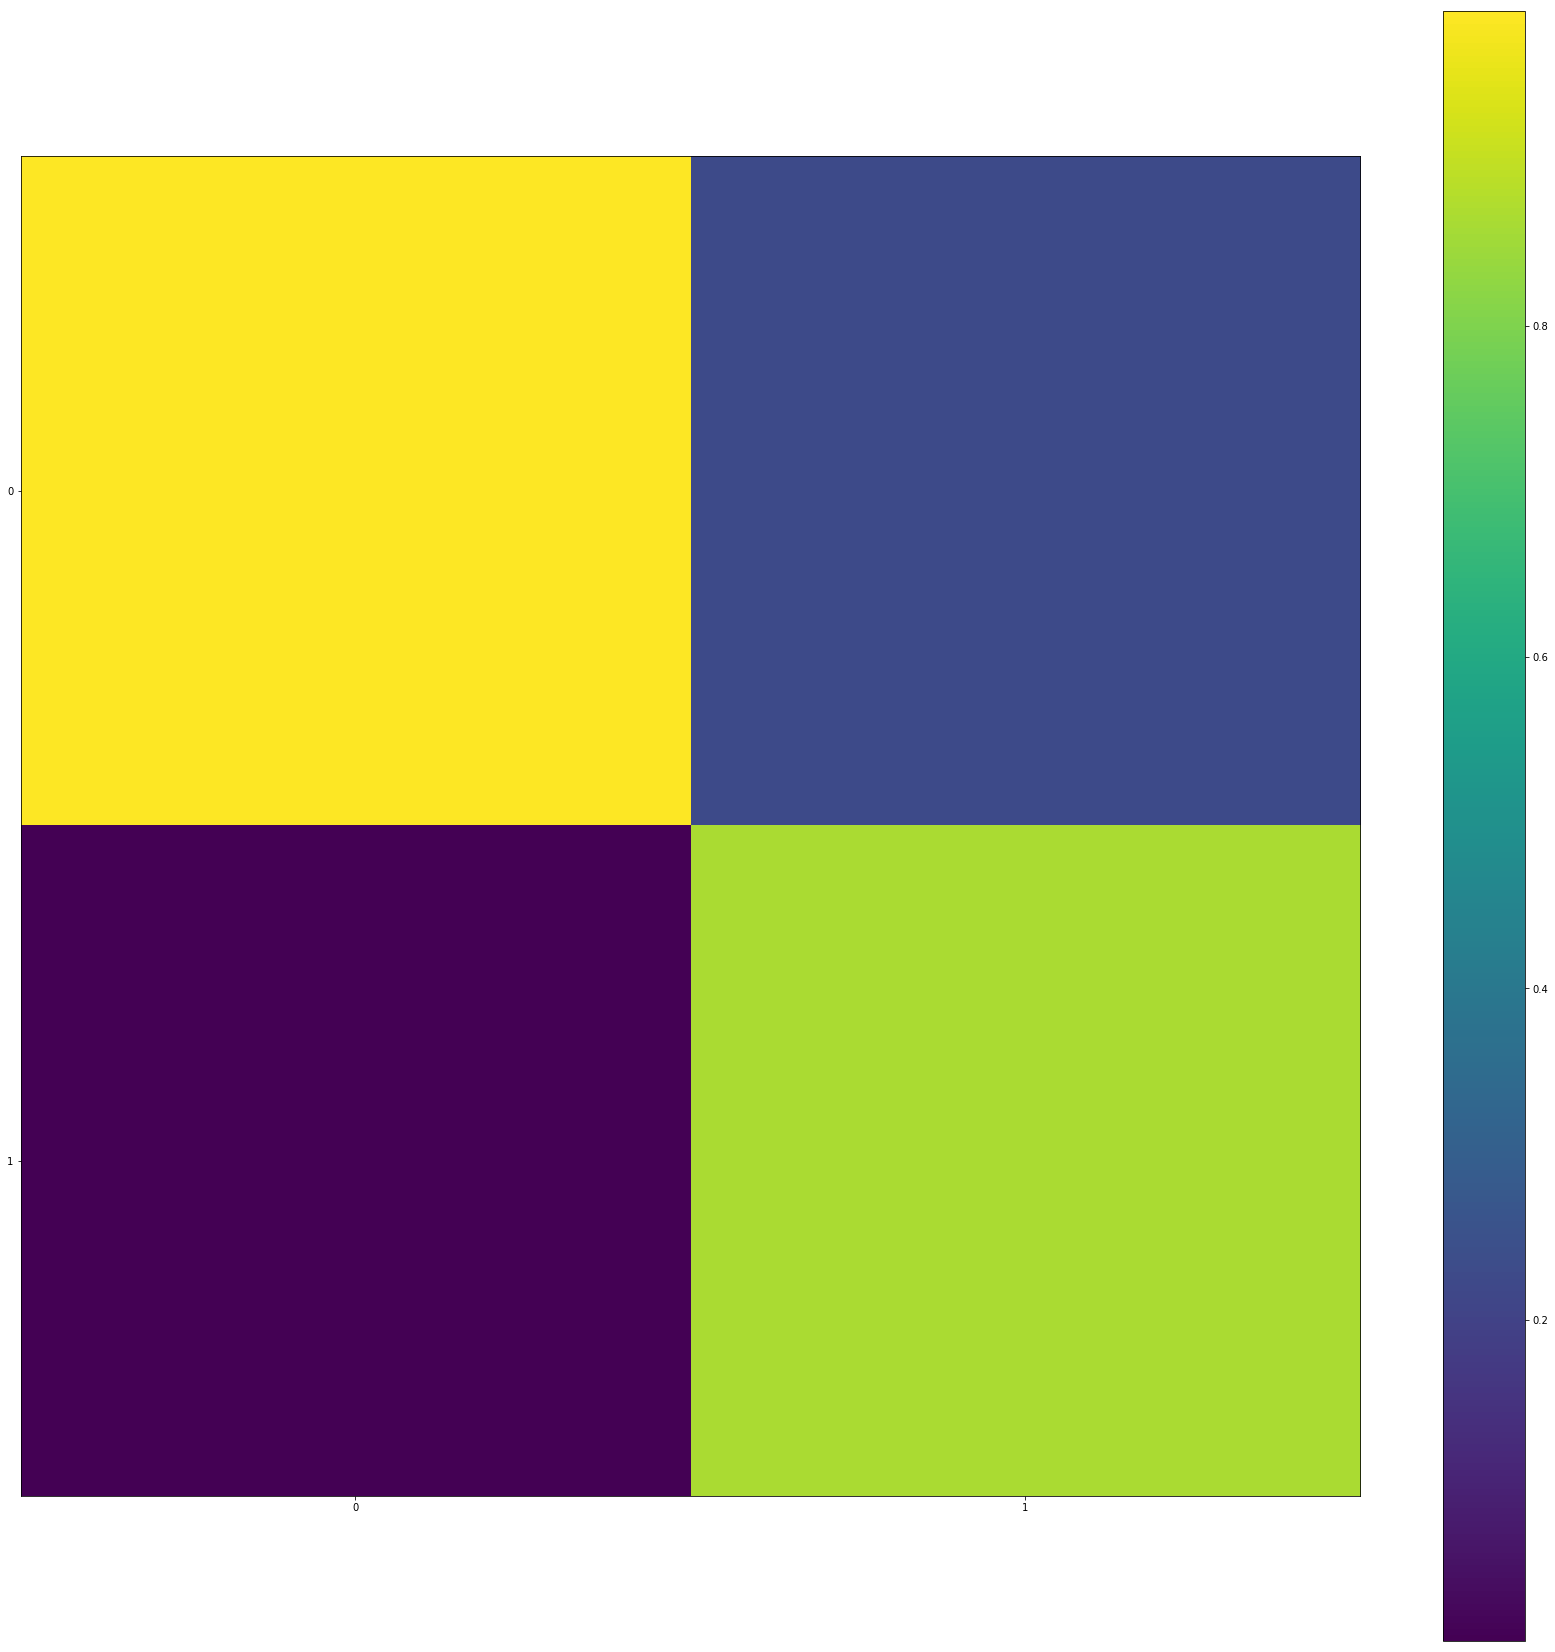

In [53]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_test,yhat_ts)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.xticks(np.arange(0, 1.01, step=1.0))
plt.yticks(np.arange(0, 1.01, step=1.0))
plt.imshow(C, interpolation='none')
plt.colorbar()

In [54]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([527,  22]))

In [55]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([2107,   89]))

In [56]:
np.unique(yhat_ts,return_counts=True)

(array([0, 1]), array([525,  24]))

In [57]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(verbose=10, solver='lbfgs',\
                                         multi_class='multinomial',max_iter=1000)
logreg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=10,
                   warm_start=False)

In [58]:
yhat = logreg.predict(X_test)
acc1 = np.mean(yhat == y_test)
acc1

0.9854280510018215

[[0.991 0.227]
 [0.006 0.864]]


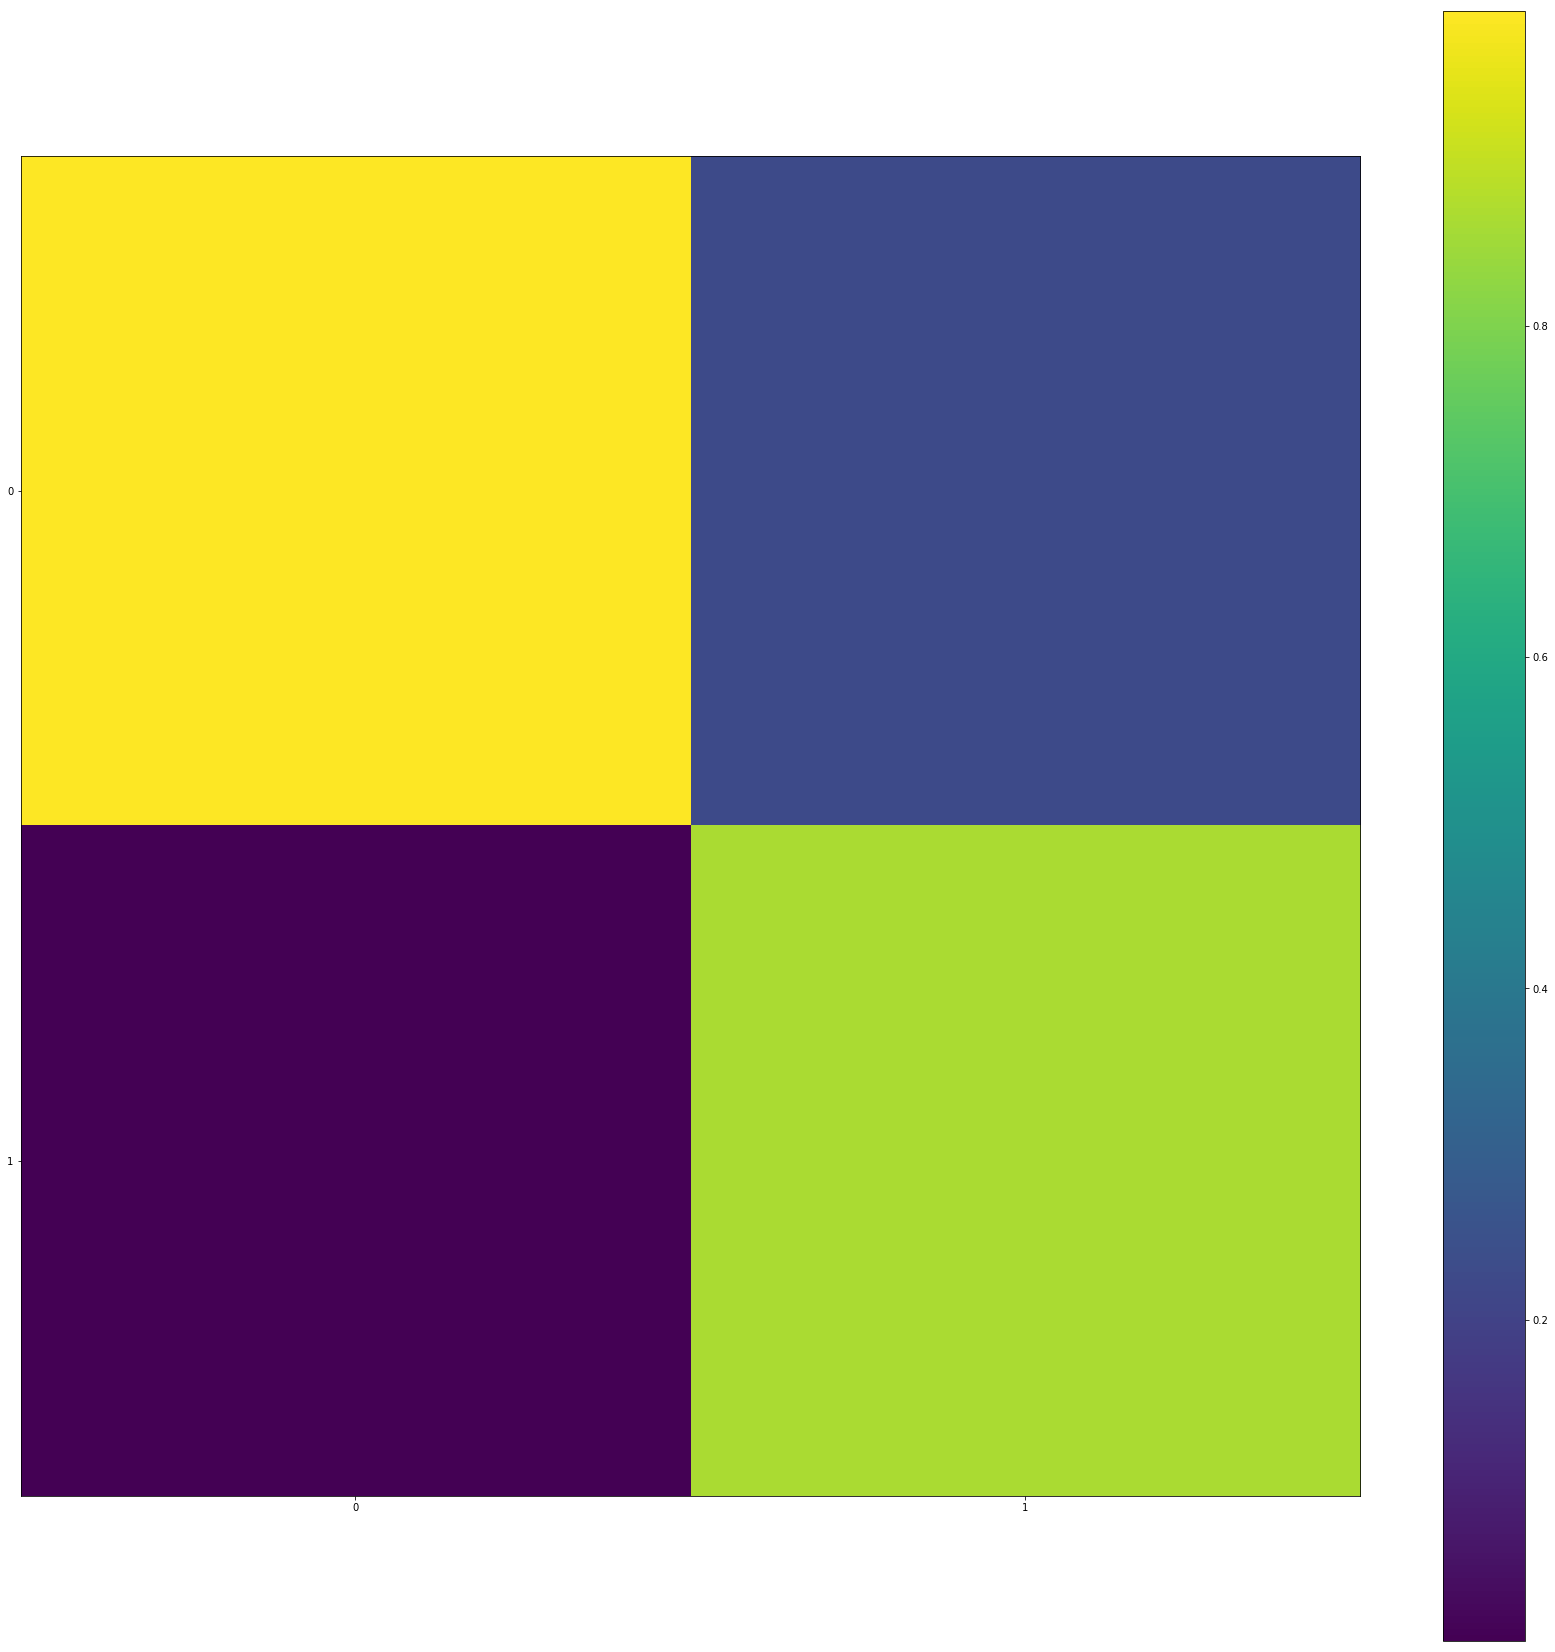

In [59]:
C1 = confusion_matrix(y_test,yhat_ts)


# Normalize the confusion matrix
Csum1 = np.sum(C1,1)
C1 = C1 / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C1, precision=3, suppress_small=True))
plt.xticks(np.arange(0, 1.01, step=1.0))
plt.yticks(np.arange(0, 1.01, step=1.0))
plt.imshow(C1, interpolation='none')
plt.colorbar()

In [60]:
X_multi=np.array([final_file_0_500[1],final_file_0_500[2],final_file_0_500[5]])

y_multi = final_file_0_500[4]

Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_multi.T, y_multi, test_size=0.20, random_state=42)
ym_train=ym_train.astype('int')
ym_test=ym_test.astype('int')


In [61]:
clf = svm.SVC(probability=False,  kernel="linear", C=2.8, gamma=.0073,verbose=10)

In [62]:
clf.fit(Xm_train, ym_train)


[LibSVM]

SVC(C=2.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0073, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=10)

In [63]:
ymhat = clf.predict(Xm_test)
acc1 = np.mean(ymhat == ym_test)
acc1

0.9380692167577414

[[[0.997 0.003 0.    0.    0.   ]
  [0.2   0.8   0.    0.    0.   ]
  [0.    0.078 0.922 0.    0.   ]
  [0.    0.    0.118 0.784 0.098]
  [0.    0.    0.    0.136 0.864]]]


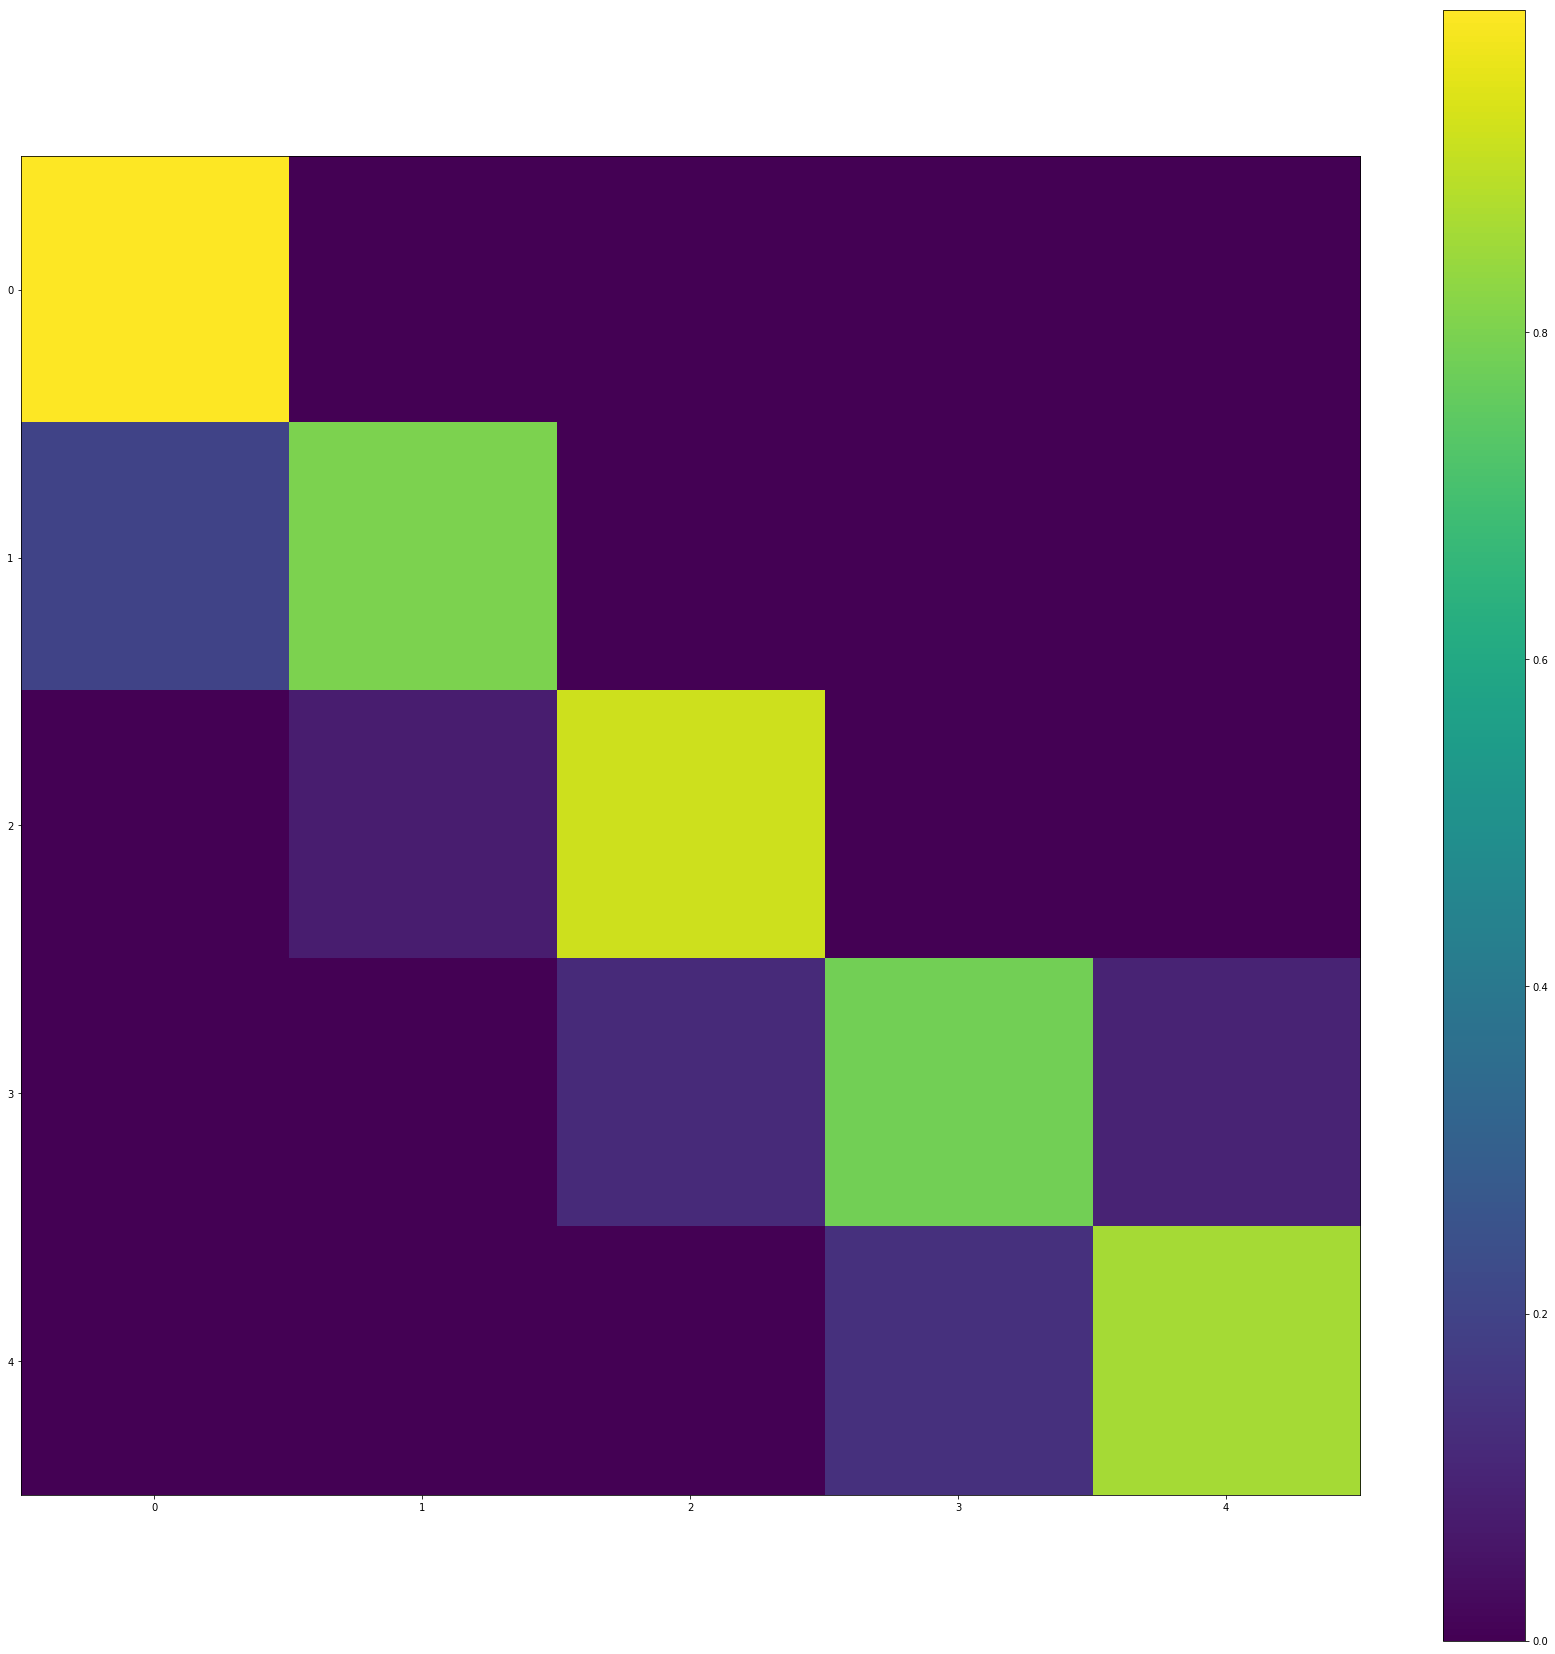

In [65]:
C2 = confusion_matrix(ym_test,ymhat)


# Normalize the confusion matrix
Csum1 = np.sum(C2,1)
C2 = C2[None, :]/Csum1[:,None]

# Print the confusion matrix
print(np.array_str(C2, precision=3, suppress_small=True))
plt.imshow(C2[0], interpolation='none')
plt.colorbar()


In [66]:
final_file_0_500

array([['2FB1B61E', '2FB1B612', '2FB1B613', ..., 'Q3No227', 'Q3No228', 'Q3No335'],
       [7.026839, 7.183357000000001, 7.182978, ..., 5.6584970000000006, 5.657417, 7.52665],
       [0.0030108994531829465, 0.0024419030790558314, 0.0024424472246273605, ..., 0.17502859737146195, 0.17515226190929217, 0.05442337370091812],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 3, 3, 1],
       [0, 0, 0, ..., 4, 4, 4]], dtype=object)

In [67]:
x0_predict_41=np.vstack([color_indexed0_41.NodePressure, color_indexed0_41.PressureDeviation, color_indexed0_41.color])

yhat_ts = clf.predict(x0_predict_41.T)


In [68]:
x0_predict_1=color_indexed0_41
x0_predict_1.color = yhat_ts
draw_3d_color(x0_predict_1,"hello")

NameError: name 'draw_3d_color' is not defined

Current size: [30, 30]


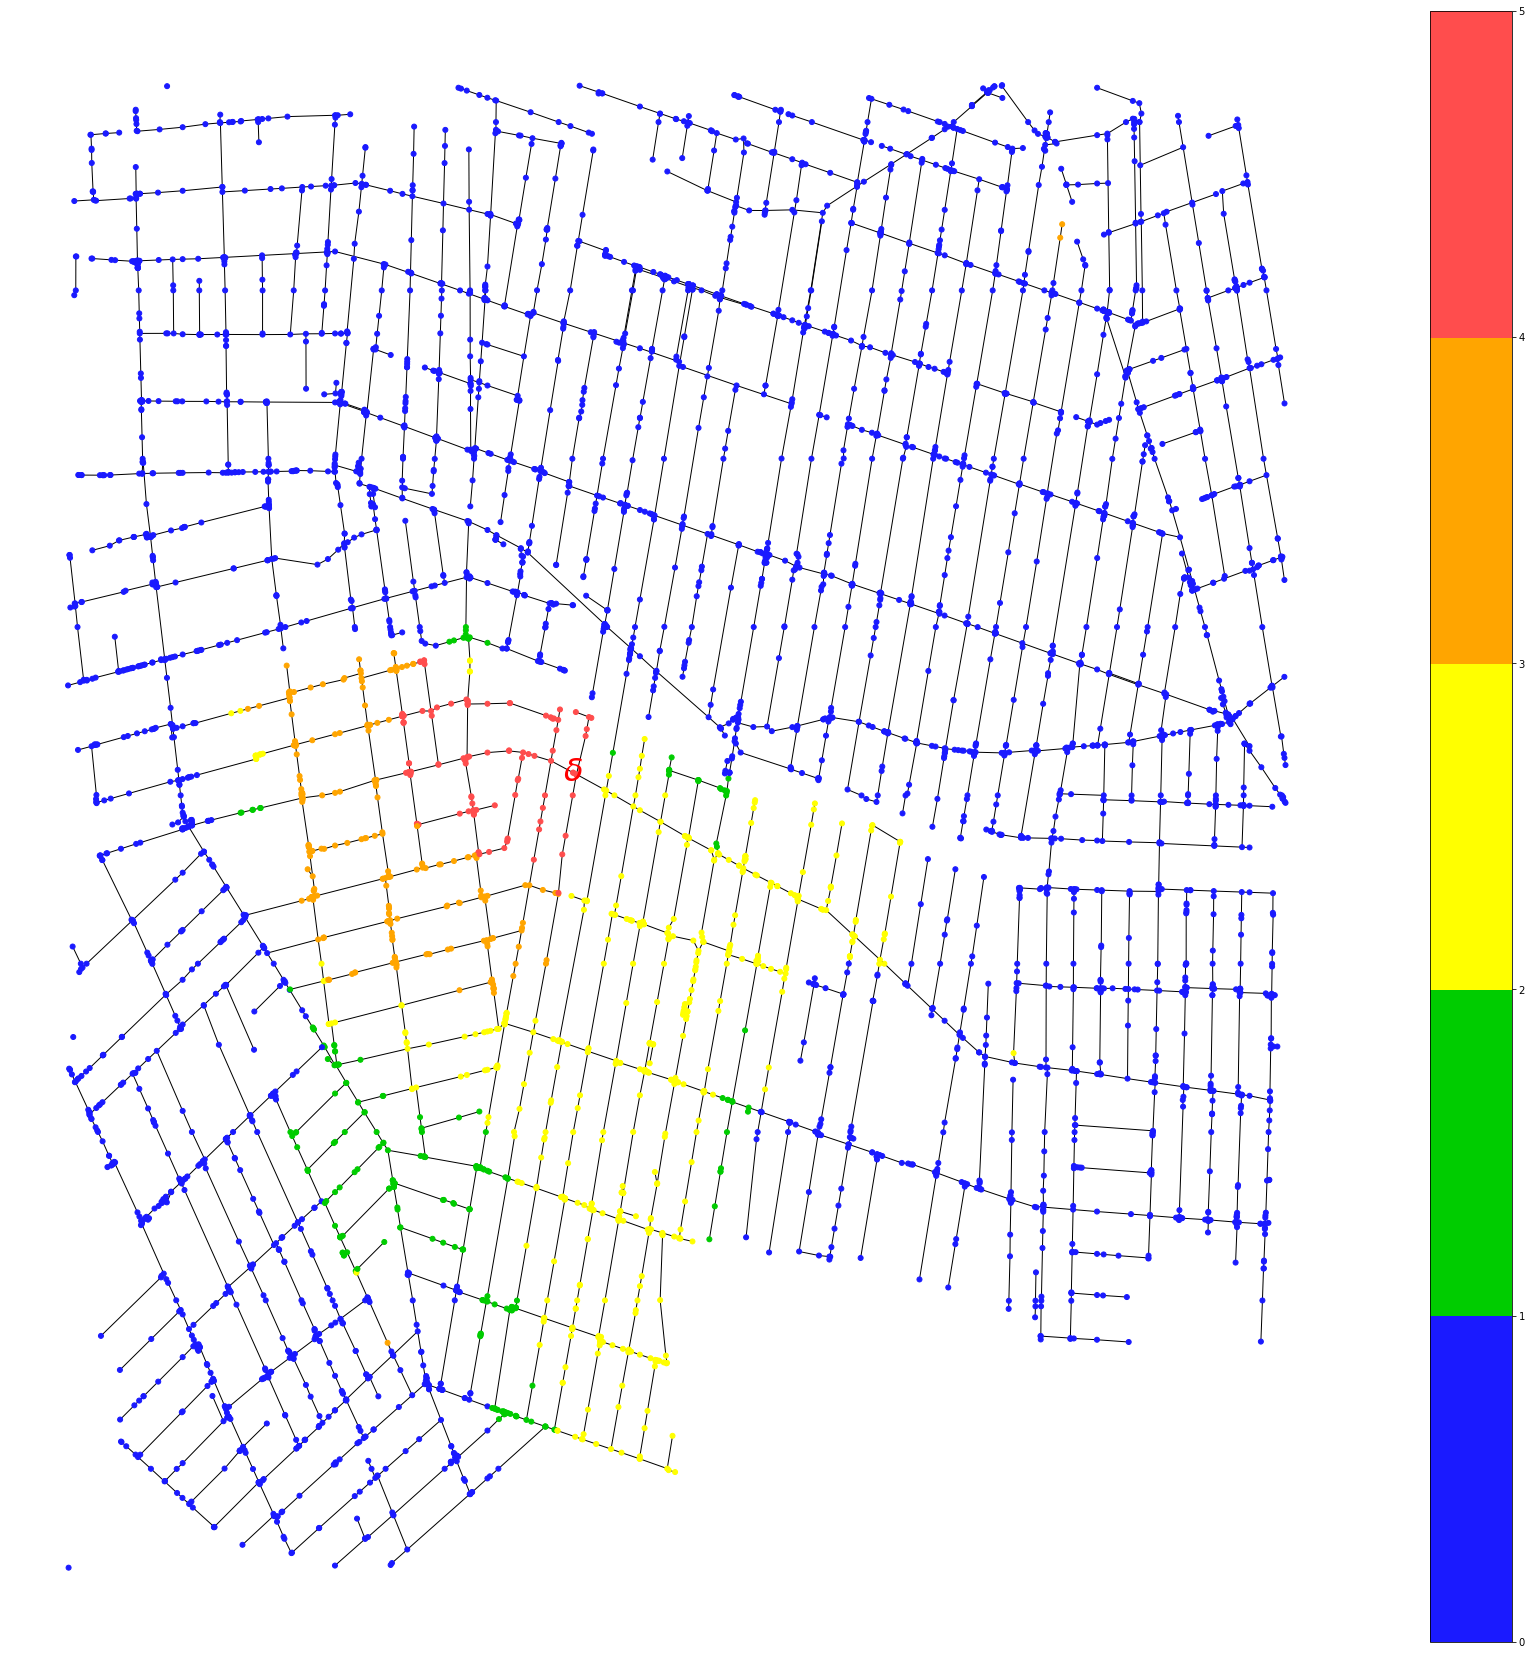

In [121]:
draw_graph_scale(x0_predict_1,"hello")

In [95]:
color_indexed0_1.to_csv("./data/nodes/full/color_indexed0_1.csv")
color_indexed0_11.to_csv("./data/nodes/full/color_indexed0_11.csv")
color_indexed0_21.to_csv("./data/nodes/full/color_indexed0_21.csv")
color_indexed0_31.to_csv("./data/nodes/full/color_indexed0_31.csv")
color_indexed0_41.to_csv("./data/nodes/full/color_indexed0_41.csv")

In [74]:
max(color_indexed0_11.PressureDeviation)

0.06423463124967765

In [75]:
np.argmax(color_indexed0_41.PressureDeviation)
color_indexed0_41.iloc[1786].NodePressure

5.3429720000000005

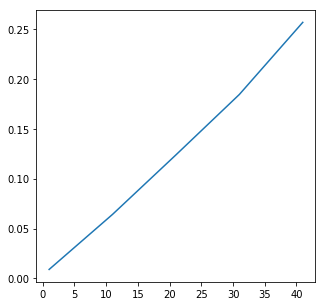

In [76]:
arr=[1,11,21,31,41]
vals=[np.max(color_indexed0_1.PressureDeviation),np.max(color_indexed0_11.PressureDeviation),np.max(color_indexed0_21.PressureDeviation),np.max(color_indexed0_31.PressureDeviation),np.max(color_indexed0_41.PressureDeviation)]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.plot(arr, vals)